# DSC Predictive Modelling

# A group project for Descriptive and Predictive Analytics
### By Jea Verayo & Brigth Arias & Josephine Scheegans

In [968]:
# Import libraries
import numpy as np               # Arrary
import pandas as pd              # DataFrame
import matplotlib.pyplot as plt  # Plotting
from dateutil.relativedelta import relativedelta
from datetime import datetime, timedelta
from scipy.stats          import pearsonr
from numpy                import array
from numpy                import random
from sklearn.linear_model import LogisticRegression 
from sklearn.metrics      import auc
from sklearn.metrics      import roc_auc_score
from scipy.stats.mstats   import winsorize
#import scikitplot as skplt
import seaborn as sns

import math
import sys

from pandas                 import DataFrame
from pandas                 import read_csv
from numpy                  import array
from numpy                  import random
from sklearn.tree           import DecisionTreeClassifier
from sklearn.ensemble       import RandomForestClassifier
from sklearn.ensemble       import GradientBoostingClassifier
from sklearn.svm            import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors      import KNeighborsClassifier
from sklearn.metrics        import accuracy_score
from matplotlib             import pyplot

from ieseg import partition
from ieseg import roc
from ieseg import lift
from ieseg import cumulativeResponse
from ieseg import cumulativeGains
import warnings

In [969]:
pd.set_option('display.max_rows', None)

In [970]:
warnings.filterwarnings('ignore')

## Importing the datasets

### 1. Read CSV and clean data

In [971]:
directory = r"C:\Users\jverayo\Downloads\Predictive Analytics\GROUP ASSIGNMENT DSC use-case-20221109"

In [972]:
Campaigns = pd.read_csv(directory + "\campaigns.csv", sep=';')
Donors = pd.read_csv(directory + "\donors.csv", sep=',', index_col = 0)
Gifts = pd.read_csv(directory + "\gifts.csv", sep=',', index_col = 0)
trainingSet_campaign6169 = pd.read_csv(directory + "\selection campaign 6169.csv")
testSet_campaign7244 = pd.read_csv(directory + "\selection campaign 7244.csv")

### 2. Inspect data

In [973]:
#Inspecting campaigns data
Campaigns.head()

campaignID        date lettersSent CostUnit
0         153  13/12/2004       6 873   0,17 €
1         154  01/01/2005       7 656   0,30 €
2         180  18/01/2005       9 933   0,20 €
3         433  29/01/2005       7 448   0,59 €
4         476  12/02/2005       6 605   0,51 €

In [974]:
#Inspecting donors data
Donors.head()

donorID  zipcode         province    region gender language dateOfBirth
0   100001   1861.0  Flemish Brabant  Flanders      F       NL  12/24/1967
1   100002   2260.0          Antwerp  Flanders      M       NL  01/14/1952
2   100003   1780.0  Flemish Brabant  Flanders      M       NL  12/23/1986
3   100004   1020.0         Brussels  Brussels      F       FR  03/29/1952
4   100005   1020.0         Brussels  Brussels      F       FR  06/25/1986

In [975]:
#Inspecting gifts data
Gifts.head()

donorID  campaignID amount        date
0   100001         NaN  12,39  2004-03-23
1   100001      1577.0  12,39  2007-10-11
2   100001      1634.0   6,69  2007-12-28
3   100001      1778.0  24,79  2008-06-14
4   100001      1808.0   7,44  2008-07-09

### 3. Inspect columns

In [976]:
#Inspecting the format of columns in Donors basetable
Donors.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 44691 entries, 0 to 44690
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   donorID      44691 non-null  int64  
 1   zipcode      44689 non-null  float64
 2   province     44691 non-null  object 
 3   region       44691 non-null  object 
 4   gender       44659 non-null  object 
 5   language     44691 non-null  object 
 6   dateOfBirth  44691 non-null  object 
dtypes: float64(1), int64(1), object(5)
memory usage: 2.7+ MB


In [977]:
#Inspecting the format of columns in Gifts basetable
Gifts.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 216594 entries, 0 to 216593
Data columns (total 4 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   donorID     216594 non-null  int64  
 1   campaignID  200957 non-null  float64
 2   amount      216594 non-null  object 
 3   date        216594 non-null  object 
dtypes: float64(1), int64(1), object(2)
memory usage: 8.3+ MB


In [978]:
#Inspecting the format of columns in Campaigns basetable
Campaigns.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 367 entries, 0 to 366
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   campaignID   367 non-null    int64 
 1   date         367 non-null    object
 2   lettersSent  367 non-null    object
 3   CostUnit     367 non-null    object
dtypes: int64(1), object(3)
memory usage: 11.6+ KB


## Pre-processing the data

####  Donors

In [979]:
#View of donors table
Donors = Donors.rename(columns= {'dateOfBirth':'DOB'})
Donors['DOB'] = pd.to_datetime(Donors['DOB']) #dateOfBirth converting from str to date
Donors.head()

donorID  zipcode         province    region gender language        DOB
0   100001   1861.0  Flemish Brabant  Flanders      F       NL 1967-12-24
1   100002   2260.0          Antwerp  Flanders      M       NL 1952-01-14
2   100003   1780.0  Flemish Brabant  Flanders      M       NL 1986-12-23
3   100004   1020.0         Brussels  Brussels      F       FR 1952-03-29
4   100005   1020.0         Brussels  Brussels      F       FR 1986-06-25

In [980]:
# Creation of data frame for campaign 6169
df_6169 = trainingSet_campaign6169
df_6169

donorID
0       100001
1       100002
2       100004
3       100008
4       100009
5       100010
6       100011
7       100012
8       100013
9       100014
10      100016
11      100017
12      100018
13      100019
14      100021
15      100022
16      100023
17      100024
18      100025
19      100026
20      100028
21      100029
22      100031
23      100032
24      100034
25      100035
26      100036
27      100037
28      100039
29      100040
30      100041
31      100042
32      100043
33      100045
34      100046
35      100048
36      100051
37      100052
38      100053
39      100055
40      100056
41      100058
42      100060
43      100061
44      100062
45      100063
46      100064
47      100065
48      100066
49      100068
50      100070
51      100073
52      100074
53      100075
54      100076
55      100077
56      100079
57      100081
58      100082
59      100083
60      100084
61      100086
62      100087
63      100089
64      100090
65      100091
66      100092
67      100093
68      100094
69      100095
70      100096
71      100097
72      100099
73      100100
74      100101
75      100102
76      100103
77      100104
78      100105
79      100106
80      100107
81      100108
82      100110
83      100111
84      100112
85      100113
86      100114
87      100115
88      100116
89      100117
90      100118
91      100119
92      100120
93      100121
94      100124
95      100125
96      100126
97      100127
98      100129
99      100130
100     100131
101     100133
102     100134
103     100136
104     100137
105     100138
106     100139
107     100141
108     100142
109     100143
110     100144
111     100145
112     100146
113     100147
114     100149
115     100150
116     100151
117     100152
118     100154
119     100155
120     100158
121     100159
122     100160
123     100161
124     100162
125     100166
126     100167
127     100168
128     100169
129     100170
130     100171
131     100172
132     100173
133     100174
134     100175
135     100176
136     100177
137     100178
138     100179
139     100180
140     100181
141     100183
142     100184
143     100187
144     100188
145     100190
146     100194
147     100196
148     100199
149     100201
150     100202
151     100203
152     100204
153     100207
154     100209
155     100211
156     100212
157     100213
158     100214
159     100215
160     100216
161     100217
162     100218
163     100220
164     100223
165     100224
166     100225
167     100226
168     100227
169     100228
170     100230
171     100231
172     100233
173     100235
174     100236
175     100237
176     100238
177     100239
178     100241
179     100242
180     100243
181     100244
182     100245
183     100246
184     100250
185     100252
186     100253
187     100254
188     100255
189     100256
190     100257
191     100260
192     100262
193     100264
194     100265
195     100266
196     100267
197     100268
198     100270
199     100271
200     100272
201     100273
202     100275
203     100276
204     100277
205     100278
206     100279
207     100280
208     100281
209     100282
210     100283
211     100284
212     100285
213     100286
214     100287
215     100289
216     100290
217     100291
218     100294
219     100295
220     100296
221     100297
222     100298
223     100299
224     100300
225     100302
226     100306
227     100307
228     100308
229     100309
230     100310
231     100311
232     100312
233     100313
234     100314
235     100315
236     100316
237     100317
238     100318
239     100319
240     100320
241     100321
242     100322
243     100323
244     100324
245     100325
246     100326
247     100328
248     100329
249     100330
250     100331
251     100333
252     100334
253     100335
254     100337
255     100338
256     100339
257     100340
258     100341
259     100342
260     100343
261     100344
262     100345
263     100346
264     100347
265     100348
26

In [981]:
# Create dummy variables for region
df_6169['region'] = Donors.region
df_6169 = pd.get_dummies(df_6169, ['region'])

# Create dummy variables for gender
df_6169['gender'] = Donors.gender
df_6169 = pd.get_dummies(df_6169, ['gender'])

# Create dummy variables for language
df_6169['language'] = Donors.language
df_6169 = pd.get_dummies(df_6169, ['language'])

df_6169.head()

donorID  region_Brussels  region_Flanders  region_Missing  region_Wallonia  \
0   100001                0                1               0                0   
1   100002                0                1               0                0   
2   100004                0                1               0                0   
3   100008                1                0               0                0   
4   100009                1                0               0                0   

   gender_F  gender_M  language_EN  language_FR  language_NL  
0         1         0            0            0            1  
1         0         1            0            0            1  
2         0         1            0            0            1  
3         1         0            0            1            0  
4         1         0            0            1            0

In [982]:
#Compute donors' age from the birthdate
from datetime import datetime
df_6169['age'] = datetime(2018, 9, 4) - Donors.DOB
df_6169['age']= df_6169['age']/np.timedelta64(1, 'Y')
df_6169['age'] = np.floor(df_6169['age'])
df_6169['age'] = df_6169['age'].astype(int)
df_6169.head()

donorID  region_Brussels  region_Flanders  region_Missing  region_Wallonia  \
0   100001                0                1               0                0   
1   100002                0                1               0                0   
2   100004                0                1               0                0   
3   100008                1                0               0                0   
4   100009                1                0               0                0   

   gender_F  gender_M  language_EN  language_FR  language_NL  age  
0         1         0            0            0            1   50  
1         0         1            0            0            1   66  
2         0         1            0            0            1   31  
3         1         0            0            1            0   66  
4         1         0            0            1            0   32

In [983]:
#Check for outliers in the age column
df_6169.age.unique()

array([ 50,  66,  31,  32,  92,  61,  81,  86,  35,  55,  41,  44,  56,
        39,  25,  47,  60,  45,  64,  63,  24,  54,  46,  84,  52,  43,
        59,  80,  57,  30,  36,  28,  42,  62,  26,  53,  27,  48,  85,
        69,  40,  58,  49,  33,  68,  51,  29,  70,  73,  23,  67,  38,
        77,  74,  72,  65,  71,  76,  88,  79,  83,  82,  37,  34,  97,
        94,  75,  91,  89,  78,  87,  96,  98,  90,  93,  95,  99, 129,
       126])

In [984]:
#Replace the outliers with the median age of the 6169 donors
median_age_6169 = df_6169["age"].median()

# Replace missing values in the Age column with the median age
df_6169['age'] = np.where(df_6169['age'] >= 100, median_age_6169, df_6169['age'])
df_6169.age.unique()

array([50., 66., 31., 32., 92., 61., 81., 86., 35., 55., 41., 44., 56.,
       39., 25., 47., 60., 45., 64., 63., 24., 54., 46., 84., 52., 43.,
       59., 80., 57., 30., 36., 28., 42., 62., 26., 53., 27., 48., 85.,
       69., 40., 58., 49., 33., 68., 51., 29., 70., 73., 23., 67., 38.,
       77., 74., 72., 65., 71., 76., 88., 79., 83., 82., 37., 34., 97.,
       94., 75., 91., 89., 78., 87., 96., 98., 90., 93., 95., 99.])

In [985]:
#Create a variable for age group
df_6169['age_group'] = df_6169['age'] // 10 * 10
df_6169.head()

donorID  region_Brussels  region_Flanders  region_Missing  region_Wallonia  \
0   100001                0                1               0                0   
1   100002                0                1               0                0   
2   100004                0                1               0                0   
3   100008                1                0               0                0   
4   100009                1                0               0                0   

   gender_F  gender_M  language_EN  language_FR  language_NL   age  age_group  
0         1         0            0            0            1  50.0       50.0  
1         0         1            0            0            1  66.0       60.0  
2         0         1            0            0            1  31.0       30.0  
3         1         0            0            1            0  66.0       60.0  
4         1         0            0            1            0  32.0       30.0

####  Gifts

In [986]:
#Rename the date column
Gifts = Gifts.rename(columns = {"date":"dateGifts"})
Gifts.head()

donorID  campaignID amount   dateGifts
0   100001         NaN  12,39  2004-03-23
1   100001      1577.0  12,39  2007-10-11
2   100001      1634.0   6,69  2007-12-28
3   100001      1778.0  24,79  2008-06-14
4   100001      1808.0   7,44  2008-07-09

In [987]:
# Replace missing campaign IDs with 0
Gifts['campaignID'] = Gifts['campaignID'].replace([np.nan], 0).astype(int) #campaignID replaced the missing by 0 and converting from float to int.

In [988]:
#Treatment of outliers of amount with digits more or equal than 17
# Create a column of length amount in Gifts data set
Gifts['len_amount'] = Gifts['amount'].astype(str).str.len().astype(int)
Gifts.head()

donorID  campaignID amount   dateGifts  len_amount
0   100001           0  12,39  2004-03-23           5
1   100001        1577  12,39  2007-10-11           5
2   100001        1634   6,69  2007-12-28           4
3   100001        1778  24,79  2008-06-14           5
4   100001        1808   7,44  2008-07-09           4

In [989]:
#Inspect the unique values of len_amount
Gifts['len_amount'].unique()

array([ 5,  4,  3,  6,  7, 18, 17,  9,  8])

In [990]:
# Treating amounts with <= 17 digits as outliers

# Subset the values without the outliers in order to calculate the median per donor.
set_Gifts = Gifts[Gifts['len_amount'] < 17]

#Transform the amount column of set_Gifts from string into a float
set_Gifts['amount'] = set_Gifts['amount'].astype('str').str.replace(',', '.').astype(float) #Fix this part considering the outliers

# Add a variable to calculate the median per customer ID
gifts_agg_totalAmount = set_Gifts.groupby(['donorID'])['amount'].agg('median').reset_index().rename(columns={'amount':'median_amount_gifts'})

# Replace the values of median per customer to the outliers
# Merge the median to each client
Gifts = pd.merge(Gifts, gifts_agg_totalAmount, how = 'left', on = 'donorID')

#Replace the median where length of amount <= 17
Gifts['amount'] = np.where(Gifts['amount'].astype(str).str.len().astype(int) >= 17, Gifts['median_amount_gifts'], Gifts['amount'])
Gifts.head()

donorID  campaignID amount   dateGifts  len_amount  median_amount_gifts
0   100001           0  12,39  2004-03-23           5               11.195
1   100001        1577  12,39  2007-10-11           5               11.195
2   100001        1634   6,69  2007-12-28           4               11.195
3   100001        1778  24,79  2008-06-14           5               11.195
4   100001        1808   7,44  2008-07-09           4               11.195

In [991]:
#Assume that all numbers after the first comma are decimals including amounts with three decimal places
#Transform the amount column of Gifts into a float
Gifts['amount'] = Gifts['amount'].astype('str').str.replace(',', '.').astype(float) #Fix this part considering the outliers

#Transform the date column of Gifts from str to date format
Gifts['dateGifts'] = pd.to_datetime(Gifts['dateGifts']) 

In [992]:
#Winsorize the amount of the Gifts to treat outliers

dict = Gifts['amount'].quantile([.01,.05,.95,.99]).to_dict()
Gifts[Gifts["amount"] >= dict[0.99]][["donorID","amount"]]

Gifts['amount'] = winsorize(array(Gifts['amount']), limits=[0.00, 0.01])

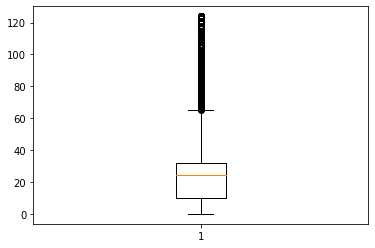

In [993]:
# Inspect if there are still outliers in the amount
fig, ax = plt.subplots()
ax.boxplot(Gifts['amount'])
plt.show()

In [994]:
# Create columns for period
#https://stackoverflow.com/questions/30222533/create-a-day-of-week-column-in-a-pandas-dataframe-using-python
Gifts['year_donated'], Gifts['month_donated'], Gifts['day_donated'], Gifts['weekday_donated'] = Gifts['dateGifts'].dt.year, Gifts['dateGifts'].dt.month, Gifts['dateGifts'].dt.day, Gifts['dateGifts'].dt.dayofweek
Gifts.head()

donorID  campaignID  amount  dateGifts  len_amount  median_amount_gifts  \
0   100001           0   12.39 2004-03-23           5               11.195   
1   100001        1577   12.39 2007-10-11           5               11.195   
2   100001        1634    6.69 2007-12-28           4               11.195   
3   100001        1778   24.79 2008-06-14           5               11.195   
4   100001        1808    7.44 2008-07-09           4               11.195   

   year_donated  month_donated  day_donated  weekday_donated  
0          2004              3           23                1  
1          2007             10           11                3  
2          2007             12           28                4  
3          2008              6           14                5  
4          2008              7            9                2

In [995]:
Gifts.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 216594 entries, 0 to 216593
Data columns (total 10 columns):
 #   Column               Non-Null Count   Dtype         
---  ------               --------------   -----         
 0   donorID              216594 non-null  int64         
 1   campaignID           216594 non-null  int32         
 2   amount               216594 non-null  float64       
 3   dateGifts            216594 non-null  datetime64[ns]
 4   len_amount           216594 non-null  int32         
 5   median_amount_gifts  216594 non-null  float64       
 6   year_donated         216594 non-null  int64         
 7   month_donated        216594 non-null  int64         
 8   day_donated          216594 non-null  int64         
 9   weekday_donated      216594 non-null  int64         
dtypes: datetime64[ns](1), float64(2), int32(2), int64(5)
memory usage: 16.5 MB


In [996]:
# Prepare data set for Campaigns
Campaigns = Campaigns.rename(columns = {"date":"dateCampaign"}) #Changing the name of the column date
Campaigns['dateCampaign'] = pd.to_datetime(Campaigns['dateCampaign'], format = "%d/%m/%Y") #date converted from str to date
Campaigns['lettersSent'] = Campaigns['lettersSent'].str.replace(u'\u202f','').str.replace(' ', '').astype(int) #Converting lettersSent from str to int
Campaigns['CostUnit'] = Campaigns['CostUnit'].str.replace(u'\xa0',' ').str.replace(',','.').str.replace('€','').astype(float)
#Campaigns['lettersSent'].unique()
Campaigns["Total_Cost"] = Campaigns.lettersSent*Campaigns.CostUnit #Compute for total cost
Campaigns.head()

campaignID dateCampaign  lettersSent  CostUnit  Total_Cost
0         153   2004-12-13         6873      0.17     1168.41
1         154   2005-01-01         7656      0.30     2296.80
2         180   2005-01-18         9933      0.20     1986.60
3         433   2005-01-29         7448      0.59     4394.32
4         476   2005-02-12         6605      0.51     3368.55

## Data Processing - 6169

In [997]:
training_drop_date = datetime.strptime('2018-09-04', "%Y-%m-%d")

In [998]:
#Creating time frames
training_1M = training_drop_date - relativedelta(months=+1)
training_3M = training_drop_date - relativedelta(months=+3)
training_6M = training_drop_date - relativedelta(months=+6)
training_9M = training_drop_date - relativedelta(months=+9)
training_1Y = training_drop_date - relativedelta(months=+12)
training_2Y = training_drop_date - relativedelta(months=+24)
training_5Y = training_drop_date - relativedelta(months=+60)
training_10Y = training_drop_date - relativedelta(months=+120)
training_15Y = training_drop_date - relativedelta(months=+180)

#### Gifts

In [999]:
#Create variables for Amount of Donations in different time periods
gifts_agg_totalAmount = Gifts.loc[(Gifts.dateGifts < training_drop_date)].groupby(['donorID'])['amount'].agg('sum').reset_index()
gifts_agg_totalAmount1Month = Gifts.loc[(Gifts.dateGifts < training_drop_date) & (Gifts.dateGifts >= training_1M)].groupby(['donorID'])['amount'].agg('sum').reset_index() #Verify because the amount is being the same
gifts_agg_totalAmount3Months = Gifts.loc[(Gifts.dateGifts < training_drop_date) & (Gifts.dateGifts >= training_3M)].groupby(['donorID'])['amount'].agg('sum').reset_index() 
gifts_agg_totalAmount6Months = Gifts.loc[(Gifts.dateGifts < training_drop_date) & (Gifts.dateGifts >= training_6M)].groupby(['donorID'])['amount'].agg('sum').reset_index() 
gifts_agg_totalAmount9Months = Gifts.loc[(Gifts.dateGifts < training_drop_date) & (Gifts.dateGifts >= training_9M)].groupby(['donorID'])['amount'].agg('sum').reset_index() 
gifts_agg_totalAmount1Year = Gifts.loc[(Gifts.dateGifts < training_drop_date) & (Gifts.dateGifts >= training_1Y)].groupby(['donorID'])['amount'].agg('sum').reset_index()
gifts_agg_totalAmount2Years = Gifts.loc[(Gifts.dateGifts < training_drop_date) & (Gifts.dateGifts >= training_2Y)].groupby(['donorID'])['amount'].agg('sum').reset_index()
gifts_agg_totalAmount5Years = Gifts.loc[(Gifts.dateGifts < training_drop_date) & (Gifts.dateGifts >= training_5Y)].groupby(['donorID'])['amount'].agg('sum').reset_index()
gifts_agg_totalAmount10Years = Gifts.loc[(Gifts.dateGifts < training_drop_date) & (Gifts.dateGifts >= training_10Y)].groupby(['donorID'])['amount'].agg('sum').reset_index()
gifts_agg_totalAmount15Years = Gifts.loc[(Gifts.dateGifts < training_drop_date) & (Gifts.dateGifts >= training_15Y)].groupby(['donorID'])['amount'].agg('sum').reset_index()

#Rename the amount columns to include the period
gifts_agg_totalAmount1Month = gifts_agg_totalAmount1Month.rename(columns={'amount':'amount_1Month'})
gifts_agg_totalAmount3Months = gifts_agg_totalAmount3Months.rename(columns={'amount':'amount_3Months'})
gifts_agg_totalAmount6Months = gifts_agg_totalAmount6Months.rename(columns={'amount':'amount_6Months'})
gifts_agg_totalAmount9Months = gifts_agg_totalAmount9Months.rename(columns={'amount':'amount_9Months'})
gifts_agg_totalAmount1Year = gifts_agg_totalAmount1Year.rename(columns={'amount':'amount_1Year'})
gifts_agg_totalAmount2Years = gifts_agg_totalAmount2Years.rename(columns={'amount':'amount_2Years'})
gifts_agg_totalAmount5Years = gifts_agg_totalAmount5Years.rename(columns={'amount':'amount_5Years'})
gifts_agg_totalAmount10Years = gifts_agg_totalAmount10Years.rename(columns={'amount':'amount_10Years'})
gifts_agg_totalAmount15Years = gifts_agg_totalAmount15Years.rename(columns={'amount':'amount_15Years'})

# Join the gifts_agg_totalAmount with previous table campaign 6169
df_6169 = pd.merge(df_6169, gifts_agg_totalAmount, how='left', on='donorID')
df_6169 = pd.merge(df_6169, gifts_agg_totalAmount1Month, how='left', on='donorID')
df_6169 = pd.merge(df_6169, gifts_agg_totalAmount3Months, how='left', on='donorID')
df_6169 = pd.merge(df_6169, gifts_agg_totalAmount6Months, how='left', on='donorID')
df_6169 = pd.merge(df_6169, gifts_agg_totalAmount9Months, how='left', on='donorID')
df_6169 = pd.merge(df_6169, gifts_agg_totalAmount1Year, how='left', on='donorID')
df_6169 = pd.merge(df_6169, gifts_agg_totalAmount2Years, how='left', on='donorID')
df_6169 = pd.merge(df_6169, gifts_agg_totalAmount5Years, how='left', on='donorID')
df_6169 = pd.merge(df_6169, gifts_agg_totalAmount10Years, how='left', on='donorID')
df_6169 = pd.merge(df_6169, gifts_agg_totalAmount15Years, how='left', on='donorID')
df_6169.head()


donorID  region_Brussels  region_Flanders  region_Missing  region_Wallonia  \
0   100001                0                1               0                0   
1   100002                0                1               0                0   
2   100004                0                1               0                0   
3   100008                1                0               0                0   
4   100009                1                0               0                0   

   gender_F  gender_M  language_EN  language_FR  language_NL  ...  amount  \
0         1         0            0            0            1  ...  178.49   
1         0         1            0            0            1  ...   20.00   
2         0         1            0            0            1  ...  716.22   
3         1         0            0            1            0  ...  124.37   
4         1         0            0            1            0  ...  326.78   

   amount_1Month  amount_3Months  amount_6Months  amount_9Months  \
0            NaN             NaN             NaN             NaN   
1            NaN             NaN             NaN             NaN   
2            NaN             NaN             NaN             NaN   
3            NaN             NaN             NaN             NaN   
4            NaN             NaN             NaN             NaN   

   amount_1Year  amount_2Years  amount_5Years  amount_10Years  amount_15Years  
0           NaN            NaN            NaN          114.79          178.49  
1           NaN            NaN           20.0           20.00           20.00  
2           NaN            NaN            NaN          344.37          716.22  
3           NaN            NaN            NaN           50.00          124.37  
4           NaN            NaN            NaN          269.78          326.78  

[5 rows x 22 columns]

In [1000]:
#Create variables for Average Amount of Donations in different time periods
gifts_agg_avgTotalAmount = Gifts.loc[(Gifts.dateGifts < training_drop_date)].groupby(['donorID'])['amount'].agg('mean').reset_index()
gifts_agg_avgAmount1Month = Gifts.loc[(Gifts.dateGifts < training_drop_date) & (Gifts.dateGifts >= training_1M)].groupby(['donorID'])['amount'].agg('mean').reset_index() #Verify because the amount is being the same
gifts_agg_avgAmount3Months = Gifts.loc[(Gifts.dateGifts < training_drop_date) & (Gifts.dateGifts >= training_3M)].groupby(['donorID'])['amount'].agg('mean').reset_index() 
gifts_agg_avgAmount6Months = Gifts.loc[(Gifts.dateGifts < training_drop_date) & (Gifts.dateGifts >= training_6M)].groupby(['donorID'])['amount'].agg('mean').reset_index() 
gifts_agg_avgAmount9Months = Gifts.loc[(Gifts.dateGifts < training_drop_date) & (Gifts.dateGifts >= training_9M)].groupby(['donorID'])['amount'].agg('mean').reset_index() 
gifts_agg_avgAmount1Year = Gifts.loc[(Gifts.dateGifts < training_drop_date) & (Gifts.dateGifts >= training_1Y)].groupby(['donorID'])['amount'].agg('mean').reset_index()
gifts_agg_avgAmount2Years = Gifts.loc[(Gifts.dateGifts < training_drop_date) & (Gifts.dateGifts >= training_2Y)].groupby(['donorID'])['amount'].agg('mean').reset_index()
gifts_agg_avgAmount5Years = Gifts.loc[(Gifts.dateGifts < training_drop_date) & (Gifts.dateGifts >= training_5Y)].groupby(['donorID'])['amount'].agg('mean').reset_index()
gifts_agg_avgAmount10Years = Gifts.loc[(Gifts.dateGifts < training_drop_date) & (Gifts.dateGifts >= training_10Y)].groupby(['donorID'])['amount'].agg('mean').reset_index()
gifts_agg_avgAmount15Years = Gifts.loc[(Gifts.dateGifts < training_drop_date) & (Gifts.dateGifts >= training_15Y)].groupby(['donorID'])['amount'].agg('mean').reset_index()

#Rename the amount columns to include the period
gifts_agg_avgTotalAmount = gifts_agg_avgTotalAmount.rename(columns={'amount':'avg_totalAmount'})
gifts_agg_avgAmount1Month = gifts_agg_avgAmount1Month.rename(columns={'amount':'avgAmount_1Month'})
gifts_agg_avgAmount3Months = gifts_agg_avgAmount3Months.rename(columns={'amount':'avgAmount_3Months'})
gifts_agg_avgAmount6Months = gifts_agg_avgAmount6Months.rename(columns={'amount':'avgAmount_6Months'})
gifts_agg_avgAmount9Months = gifts_agg_avgAmount9Months.rename(columns={'amount':'avgAmount_9Months'})
gifts_agg_avgAmount1Year = gifts_agg_avgAmount1Year.rename(columns={'amount':'avgAmount_1Year'})
gifts_agg_avgAmount2Years = gifts_agg_avgAmount2Years.rename(columns={'amount':'avgAmount_2Years'})
gifts_agg_avgAmount5Years = gifts_agg_avgAmount5Years.rename(columns={'amount':'avgAmount_5Years'})
gifts_agg_avgAmount10Years = gifts_agg_avgAmount10Years.rename(columns={'amount':'avgAmount_10Years'})
gifts_agg_avgAmount15Years = gifts_agg_avgAmount15Years.rename(columns={'amount':'avgAmount_15Years'})

# Join the previous table to campaign 6169 database
df_6169 = pd.merge(df_6169, gifts_agg_avgTotalAmount, how='left', on='donorID')
df_6169 = pd.merge(df_6169, gifts_agg_avgAmount1Month, how='left', on='donorID')
df_6169 = pd.merge(df_6169, gifts_agg_avgAmount3Months, how='left', on='donorID')
df_6169 = pd.merge(df_6169, gifts_agg_avgAmount6Months, how='left', on='donorID')
df_6169 = pd.merge(df_6169, gifts_agg_avgAmount9Months, how='left', on='donorID')
df_6169 = pd.merge(df_6169, gifts_agg_avgAmount1Year, how='left', on='donorID')
df_6169 = pd.merge(df_6169, gifts_agg_avgAmount2Years, how='left', on='donorID')
df_6169 = pd.merge(df_6169, gifts_agg_avgAmount5Years, how='left', on='donorID')
df_6169 = pd.merge(df_6169, gifts_agg_avgAmount10Years, how='left', on='donorID')
df_6169 = pd.merge(df_6169, gifts_agg_avgAmount15Years, how='left', on='donorID')
df_6169.head()


donorID  region_Brussels  region_Flanders  region_Missing  region_Wallonia  \
0   100001                0                1               0                0   
1   100002                0                1               0                0   
2   100004                0                1               0                0   
3   100008                1                0               0                0   
4   100009                1                0               0                0   

   gender_F  gender_M  language_EN  language_FR  language_NL  ...  \
0         1         0            0            0            1  ...   
1         0         1            0            0            1  ...   
2         0         1            0            0            1  ...   
3         1         0            0            1            0  ...   
4         1         0            0            1            0  ...   

   avg_totalAmount  avgAmount_1Month  avgAmount_3Months  avgAmount_6Months  \
0        14.874167               NaN                NaN                NaN   
1        20.000000               NaN                NaN                NaN   
2        27.546923               NaN                NaN                NaN   
3        41.456667               NaN                NaN                NaN   
4        17.198947               NaN                NaN                NaN   

   avgAmount_9Months  avgAmount_1Year  avgAmount_2Years  avgAmount_5Years  \
0                NaN              NaN               NaN               NaN   
1                NaN              NaN               NaN              20.0   
2                NaN              NaN               NaN               NaN   
3                NaN              NaN               NaN               NaN   
4                NaN              NaN               NaN               NaN   

   avgAmount_10Years  avgAmount_15Years  
0          16.398571          14.874167  
1          20.000000          20.000000  
2          31.306364          27.546923  
3          50.000000          41.456667  
4          19.270000          17.198947  

[5 rows x 32 columns]

In [1001]:
#Create variables for Total Count of Donations in different time periods
gifts_agg_TotalDonations = Gifts.loc[(Gifts.dateGifts < training_drop_date)].groupby(['donorID'])['amount'].agg('count').reset_index()
gifts_agg_nbrDonations1Month = Gifts.loc[(Gifts.dateGifts < training_drop_date) & (Gifts.dateGifts > training_1M)].groupby(['donorID'])['amount'].agg('count').reset_index() #Verify because the amount is being the same
gifts_agg_nbrDonations3Months = Gifts.loc[(Gifts.dateGifts < training_drop_date) & (Gifts.dateGifts > training_3M)].groupby(['donorID'])['amount'].agg('count').reset_index() 
gifts_agg_nbrDonations6Months = Gifts.loc[(Gifts.dateGifts < training_drop_date) & (Gifts.dateGifts > training_6M)].groupby(['donorID'])['amount'].agg('count').reset_index() 
gifts_agg_nbrDonations9Months = Gifts.loc[(Gifts.dateGifts < training_drop_date) & (Gifts.dateGifts > training_9M)].groupby(['donorID'])['amount'].agg('count').reset_index() 
gifts_agg_nbrDonations1Year = Gifts.loc[(Gifts.dateGifts < training_drop_date) & (Gifts.dateGifts > training_1Y)].groupby(['donorID'])['amount'].agg('count').reset_index()
gifts_agg_nbrDonations2Years = Gifts.loc[(Gifts.dateGifts < training_drop_date) & (Gifts.dateGifts > training_2Y)].groupby(['donorID'])['amount'].agg('count').reset_index()
gifts_agg_nbrDonations5Years = Gifts.loc[(Gifts.dateGifts < training_drop_date) & (Gifts.dateGifts > training_5Y)].groupby(['donorID'])['amount'].agg('count').reset_index()
gifts_agg_nbrDonations10Years = Gifts.loc[(Gifts.dateGifts < training_drop_date) & (Gifts.dateGifts > training_10Y)].groupby(['donorID'])['amount'].agg('count').reset_index()
gifts_agg_nbrDonations15Years = Gifts.loc[(Gifts.dateGifts < training_drop_date) & (Gifts.dateGifts > training_15Y)].groupby(['donorID'])['amount'].agg('count').reset_index()

#Rename the amount columns to include the period
gifts_agg_TotalDonations = gifts_agg_TotalDonations.rename(columns={'amount':'nbr_totalDonations'})
gifts_agg_nbrDonations1Month = gifts_agg_nbrDonations1Month.rename(columns={'amount':'nbr_totalDonations_1Month'})
gifts_agg_nbrDonations3Months = gifts_agg_nbrDonations3Months.rename(columns={'amount':'nbr_totalDonations_3Months'})
gifts_agg_nbrDonations6Months = gifts_agg_nbrDonations6Months.rename(columns={'amount':'nbr_totalDonations_6Months'})
gifts_agg_nbrDonations9Months = gifts_agg_nbrDonations9Months.rename(columns={'amount':'nbr_totalDonations_9Months'})
gifts_agg_nbrDonations1Year = gifts_agg_nbrDonations1Year.rename(columns={'amount':'nbr_totalDonations_1Year'})
gifts_agg_nbrDonations2Years = gifts_agg_nbrDonations2Years.rename(columns={'amount':'nbr_totalDonations_2Years'})
gifts_agg_nbrDonations5Years = gifts_agg_nbrDonations5Years.rename(columns={'amount':'nbr_totalDonations_5Years'})
gifts_agg_nbrDonations10Years = gifts_agg_nbrDonations10Years.rename(columns={'amount':'nbr_totalDonations_10Years'})
gifts_agg_nbrDonations15Years = gifts_agg_nbrDonations15Years.rename(columns={'amount':'nbr_totalDonations_15Years'})

# Join the previous table to campaign 6169 database
df_6169 = pd.merge(df_6169, gifts_agg_nbrDonations1Month, how='left', on='donorID')
df_6169 = pd.merge(df_6169, gifts_agg_nbrDonations3Months, how='left', on='donorID')
df_6169 = pd.merge(df_6169, gifts_agg_nbrDonations6Months, how='left', on='donorID')
df_6169 = pd.merge(df_6169, gifts_agg_nbrDonations9Months, how='left', on='donorID')
df_6169 = pd.merge(df_6169, gifts_agg_nbrDonations1Year, how='left', on='donorID')
df_6169 = pd.merge(df_6169, gifts_agg_nbrDonations2Years, how='left', on='donorID')
df_6169 = pd.merge(df_6169, gifts_agg_nbrDonations5Years, how='left', on='donorID')
df_6169 = pd.merge(df_6169, gifts_agg_nbrDonations5Years, how='left', on='donorID')
df_6169 = pd.merge(df_6169, gifts_agg_nbrDonations10Years, how='left', on='donorID')
df_6169 = pd.merge(df_6169, gifts_agg_nbrDonations15Years, how='left', on='donorID')


In [1002]:
#Creating other variables

#Max Amount 
gifts_agg_maxAmount = Gifts.loc[(Gifts.dateGifts < training_drop_date)].groupby(['donorID'])['amount'].agg('max').reset_index()
gifts_agg_maxAmount = gifts_agg_maxAmount.rename(columns={'amount':'Max_Amount'})

#First Date Donated
gifts_DaysSinceFirstDonated = Gifts.loc[(Gifts.dateGifts < training_drop_date)].groupby(['donorID'])['dateGifts'].agg('min').reset_index()
gifts_DaysSinceFirstDonated['DaysSinceFirstDonation'] = ((training_drop_date - gifts_DaysSinceFirstDonated['dateGifts'])/ np.timedelta64(1, 'D')).astype(int)
gifts_DaysSinceFirstDonated = gifts_DaysSinceFirstDonated.drop(columns = 'dateGifts')

# Join the previous table to campaign 6169 database
df_6169 = pd.merge(df_6169, gifts_agg_maxAmount, how='left', on='donorID')
df_6169 = pd.merge(df_6169, gifts_DaysSinceFirstDonated, how='left', on='donorID')

####  Campaigns

In [1003]:
#Create a df to summarize the count of donors per campaign
Donors_Per_Campaign = pd.DataFrame()
Donors_Per_Campaign = Gifts[Gifts["campaignID"] != 0].groupby('campaignID')['donorID'].count()
Donors_Per_Campaign = Donors_Per_Campaign.reset_index()
Donors_Per_Campaign = Donors_Per_Campaign.rename(columns = {"donorID":"Donor_Count"}) #Changing the name of the column date

#Merge the donor count with the Campaigns dataset
Campaigns = pd.merge(Campaigns, Donors_Per_Campaign, how = 'left', on = 'campaignID')

#Compute the new cost per donor
Campaigns['Cost_Per_Donor'] = round(Campaigns['Total_Cost']/Campaigns['Donor_Count'],2)
Campaigns.head()

campaignID dateCampaign  lettersSent  CostUnit  Total_Cost  Donor_Count  \
0         153   2004-12-13         6873      0.17     1168.41            6   
1         154   2005-01-01         7656      0.30     2296.80            1   
2         180   2005-01-18         9933      0.20     1986.60            1   
3         433   2005-01-29         7448      0.59     4394.32            2   
4         476   2005-02-12         6605      0.51     3368.55            1   

   Cost_Per_Donor  
0          194.74  
1         2296.80  
2         1986.60  
3         2197.16  
4         3368.55

In [1004]:
# Merge the Gifts and Campaigns dataset
Gifts_Campaigns = pd.merge(Gifts, Campaigns, how = 'left', on = 'campaignID')

Gifts_Campaigns['Campaign_Year'], Gifts_Campaigns['Campaign_Month'], Gifts_Campaigns['Campaign_Day'], Gifts_Campaigns['Campaign_Weekday'] = Gifts_Campaigns['dateGifts'].dt.year, Gifts_Campaigns['dateGifts'].dt.month, Gifts_Campaigns['dateGifts'].dt.day, Gifts_Campaigns['dateGifts'].dt.dayofweek

#Calculate the numbers of days responded after letter has been sent
Gifts_Campaigns['DaysResponded'] = Gifts_Campaigns['dateGifts'] - Gifts_Campaigns['dateCampaign']
Gifts_Campaigns['DaysResponded'] = Gifts_Campaigns['DaysResponded'] / np.timedelta64(1, 'D')
Gifts_Campaigns['DaysResponded'].replace([np.nan], 0, inplace=True)
Gifts_Campaigns['DaysResponded'] = Gifts_Campaigns['DaysResponded'].astype(int)

Gifts_Campaigns.head()

donorID  campaignID  amount  dateGifts  len_amount  median_amount_gifts  \
0   100001           0   12.39 2004-03-23           5               11.195   
1   100001        1577   12.39 2007-10-11           5               11.195   
2   100001        1634    6.69 2007-12-28           4               11.195   
3   100001        1778   24.79 2008-06-14           5               11.195   
4   100001        1808    7.44 2008-07-09           4               11.195   

   year_donated  month_donated  day_donated  weekday_donated  ... lettersSent  \
0          2004              3           23                1  ...         NaN   
1          2007             10           11                3  ...     34636.0   
2          2007             12           28                4  ...     34080.0   
3          2008              6           14                5  ...     30558.0   
4          2008              7            9                2  ...     39664.0   

   CostUnit  Total_Cost  Donor_Count  Cost_Per_Donor  Campaign_Year  \
0       NaN         NaN          NaN             NaN           2004   
1      0.31    10737.16        791.0           13.57           2007   
2      0.21     7156.80       1790.0            4.00           2007   
3      0.41    12528.78       1519.0            8.25           2008   
4      0.61    24195.04       1751.0           13.82           2008   

   Campaign_Month  Campaign_Day  Campaign_Weekday  DaysResponded  
0               3            23                 1              0  
1              10            11                 3              2  
2              12            28                 4             20  
3               6            14                 5             20  
4               7             9                 2             17  

[5 rows x 21 columns]

In [1005]:
#Subset the dataset to compute for the max date before drop date of campaign
#https://stackoverflow.com/questions/17978133/python-pandas-merge-only-certain-columns
GC_Pre_6169 = Gifts_Campaigns[(Gifts_Campaigns['dateGifts'] < training_drop_date)]
GC_Pre_6169_wc = Gifts_Campaigns[(Gifts_Campaigns["campaignID"] != 0) & (Gifts_Campaigns['dateGifts'] < training_drop_date)]
GC_Pre_6169_nc = Gifts_Campaigns[(Gifts_Campaigns["campaignID"] == 0) & (Gifts_Campaigns['dateGifts'] < training_drop_date)]

In [1006]:
GC_byDonor = pd.DataFrame()

#Add Variables to Count the Number of Campaigns Responded By Each Donor for Different Durations
GC_byDonor['Count_Campaigns_Donated'] = GC_Pre_6169_wc.groupby('donorID')['campaignID'].count()
GC_byDonor['Count_Campaigns_Donated_1M'] = GC_Pre_6169_wc[(GC_Pre_6169['dateGifts'] >= training_1M)].groupby('donorID')['campaignID'].count()
GC_byDonor['Count_Campaigns_Donated_3M'] = GC_Pre_6169_wc[(GC_Pre_6169['dateGifts'] >= training_3M)].groupby('donorID')['campaignID'].count()
GC_byDonor['Count_Campaigns_Donated_6M'] = GC_Pre_6169_wc[(GC_Pre_6169['dateGifts'] >= training_6M)].groupby('donorID')['campaignID'].count()
GC_byDonor['Count_Campaigns_Donated_9M'] = GC_Pre_6169_wc[(GC_Pre_6169['dateGifts'] >= training_9M)].groupby('donorID')['campaignID'].count()
GC_byDonor['Count_Campaigns_Donated_12M'] = GC_Pre_6169_wc[(GC_Pre_6169['dateGifts'] >= training_1Y)].groupby('donorID')['campaignID'].count()
GC_byDonor['Count_Campaigns_Donated_2Y'] = GC_Pre_6169_wc[(GC_Pre_6169['dateGifts'] >= training_2Y)].groupby('donorID')['campaignID'].count()
GC_byDonor['Count_Campaigns_Donated_5Y'] = GC_Pre_6169_wc[(GC_Pre_6169['dateGifts'] >= training_5Y)].groupby('donorID')['campaignID'].count()
GC_byDonor['Count_Campaigns_Donated_10Y'] = GC_Pre_6169_wc[(GC_Pre_6169['dateGifts'] >= training_10Y)].groupby('donorID')['campaignID'].count()
GC_byDonor['Count_Campaigns_Donated_15Y'] = GC_Pre_6169_wc[(GC_Pre_6169['dateGifts'] >= training_15Y)].groupby('donorID')['campaignID'].count()

#Add Variable to count the number of days since last donated with or without
#https://www.includehelp.com/python/max-and-min-date-in-pandas-groupby.aspx
GC_byDonor['Days_Last_Donated_nc'] = training_drop_date - (GC_Pre_6169_nc.groupby(['donorID']).agg({'dateGifts': [np.max]}))
GC_byDonor['Days_Last_Donated_nc'] = GC_byDonor['Days_Last_Donated_nc'] / np.timedelta64(1, 'D')
GC_byDonor['Days_Last_Donated_nc'].replace([np.nan], 0, inplace=True)
GC_byDonor['Days_Last_Donated_nc'] = GC_byDonor['Days_Last_Donated_nc'].astype(int)

#Add Variable to count the number of days since last donated with a campaign before drop date
GC_byDonor['Days_Last_Donated_wc'] = training_drop_date - (GC_Pre_6169_wc.groupby(['donorID']).agg({'dateGifts': [np.max]}))
GC_byDonor['Days_Last_Donated_wc'] = GC_byDonor['Days_Last_Donated_wc'] / np.timedelta64(1, 'D')
GC_byDonor['Days_Last_Donated_wc'].replace([np.nan], 0, inplace=True)
GC_byDonor['Days_Last_Donated_wc'] = GC_byDonor['Days_Last_Donated_wc'].astype(int)

#Add Variable to compute average response time per donor for different durations
GC_byDonor['Ave_Response_Time_inDays'] = round(GC_Pre_6169_wc.groupby(["donorID"])["DaysResponded"].mean(),0).astype(int)
GC_byDonor['Ave_Response_Time_inDays_1M'] = round(GC_Pre_6169_wc[(GC_Pre_6169['dateGifts'] >= training_1M)].groupby(["donorID"])["DaysResponded"].mean(),0).astype(int)
GC_byDonor['Ave_Response_Time_inDays_3M'] = round(GC_Pre_6169_wc[(GC_Pre_6169['dateGifts'] >= training_3M)].groupby(["donorID"])["DaysResponded"].mean(),0).astype(int)
GC_byDonor['Ave_Response_Time_inDays_6M'] = round(GC_Pre_6169_wc[(GC_Pre_6169['dateGifts'] >= training_6M)].groupby(["donorID"])["DaysResponded"].mean(),0).astype(int)
GC_byDonor['Ave_Response_Time_inDays_9M'] = round(GC_Pre_6169_wc[(GC_Pre_6169['dateGifts'] >= training_9M)].groupby(["donorID"])["DaysResponded"].mean(),0).astype(int)
GC_byDonor['Ave_Response_Time_inDays_12M'] = round(GC_Pre_6169_wc[(GC_Pre_6169['dateGifts'] >= training_1Y)].groupby(["donorID"])["DaysResponded"].mean(),0).astype(int)
GC_byDonor['Ave_Response_Time_inDays_2Y'] = round(GC_Pre_6169_wc[(GC_Pre_6169['dateGifts'] >= training_2Y)].groupby(["donorID"])["DaysResponded"].mean(),0).astype(int)
GC_byDonor['Ave_Response_Time_inDays_5Y'] = round(GC_Pre_6169_wc[(GC_Pre_6169['dateGifts'] >= training_5Y)].groupby(["donorID"])["DaysResponded"].mean(),0).astype(int)
GC_byDonor['Ave_Response_Time_inDays_10Y'] = round(GC_Pre_6169_wc[(GC_Pre_6169['dateGifts'] >= training_10Y)].groupby(["donorID"])["DaysResponded"].mean(),0).astype(int)
GC_byDonor['Ave_Response_Time_inDays_15Y'] = round(GC_Pre_6169_wc[(GC_Pre_6169['dateGifts'] >= training_15Y)].groupby(["donorID"])["DaysResponded"].mean(),0).astype(int)

#Calculate the Total Cost Spent per donor for different durations
GC_byDonor['Total Cost'] = GC_Pre_6169_wc.groupby('donorID')['Cost_Per_Donor'].sum()
GC_byDonor['Total Cost_1M'] = GC_Pre_6169_wc[(GC_Pre_6169['dateGifts'] >= training_1M)].groupby('donorID')['Cost_Per_Donor'].sum()
GC_byDonor['Total Cost_3M'] = GC_Pre_6169_wc[(GC_Pre_6169['dateGifts'] >= training_3M)].groupby('donorID')['Cost_Per_Donor'].sum()
GC_byDonor['Total Cost_6M'] = GC_Pre_6169_wc[(GC_Pre_6169['dateGifts'] >= training_6M)].groupby('donorID')['Cost_Per_Donor'].sum()
GC_byDonor['Total Cost_9M'] = GC_Pre_6169_wc[(GC_Pre_6169['dateGifts'] >= training_9M)].groupby('donorID')['Cost_Per_Donor'].sum()
GC_byDonor['Total Cost_12M'] = GC_Pre_6169_wc[(GC_Pre_6169['dateGifts'] >= training_1Y)].groupby('donorID')['Cost_Per_Donor'].sum()
GC_byDonor['Total Cost_2Y'] = GC_Pre_6169_wc[(GC_Pre_6169['dateGifts'] >= training_2Y)].groupby('donorID')['Cost_Per_Donor'].sum()
GC_byDonor['Total Cost_5Y'] = GC_Pre_6169_wc[(GC_Pre_6169['dateGifts'] >= training_5Y)].groupby('donorID')['Cost_Per_Donor'].sum()
GC_byDonor['Total Cost_10Y'] = GC_Pre_6169_wc[(GC_Pre_6169['dateGifts'] >= training_10Y)].groupby('donorID')['Cost_Per_Donor'].sum()
GC_byDonor['Total Cost_15Y'] = GC_Pre_6169_wc[(GC_Pre_6169['dateGifts'] >= training_15Y)].groupby('donorID')['Cost_Per_Donor'].sum()

GC_byDonor = GC_byDonor.reset_index()
GC_byDonor.replace([np.nan], 0, inplace=True)
GC_byDonor.head()

donorID  Count_Campaigns_Donated  Count_Campaigns_Donated_1M  \
0   100001                       11                         0.0   
1   100002                        1                         0.0   
2   100003                        5                         0.0   
3   100004                       25                         0.0   
4   100005                        4                         0.0   

   Count_Campaigns_Donated_3M  Count_Campaigns_Donated_6M  \
0                         0.0                         0.0   
1                         0.0                         0.0   
2                         2.0                         2.0   
3                         0.0                         0.0   
4                         1.0                         1.0   

   Count_Campaigns_Donated_9M  Count_Campaigns_Donated_12M  \
0                         0.0                          0.0   
1                         0.0                          0.0   
2                         2.0                          3.0   
3                         0.0                          0.0   
4                         1.0                          1.0   

   Count_Campaigns_Donated_2Y  Count_Campaigns_Donated_5Y  \
0                         0.0                         0.0   
1                         0.0                         1.0   
2                         5.0                         5.0   
3                         0.0                         0.0   
4                         2.0                         2.0   

   Count_Campaigns_Donated_10Y  ...  Total Cost  Total Cost_1M  Total Cost_3M  \
0                          7.0  ...       94.56            0.0           0.00   
1                          1.0  ...       26.31            0.0           0.00   
2                          5.0  ...      101.63            0.0          33.09   
3                         11.0  ...      294.60            0.0           0.00   
4                          2.0  ...       47.45            0.0           9.72   

   Total Cost_6M  Total Cost_9M  Total Cost_12M  Total Cost_2Y  Total Cost_5Y  \
0           0.00           0.00            0.00           0.00           0.00   
1           0.00           0.00            0.00           0.00          26.31   
2          33.09          33.09           55.96         101.63         101.63   
3           0.00           0.00            0.00           0.00           0.00   
4           9.72           9.72            9.72          28.94          28.94   

   Total Cost_10Y  Total Cost_15Y  
0           54.92           94.56  
1           26.31           26.31  
2          101.63          101.63  
3          117.69          294.60  
4           28.94           47.45  

[5 rows x 33 columns]

In [1007]:
#Creating dfs for if donated or not per campaign
gifts_by_campaign = GC_Pre_6169.pivot_table(index='donorID', columns='campaignID', values='amount', aggfunc='count').reset_index().replace(np.nan, 0).astype(int)
gifts_by_campaign = gifts_by_campaign.rename(columns = {0: 'NoCampaign'})

#Creating dfs for amount donated per campaign
gifts_by_campaign_amount = GC_Pre_6169.pivot_table(index='donorID', columns='campaignID', values='amount', aggfunc='sum').reset_index().replace(np.nan, 0).astype(int)
gifts_by_campaign_amount = gifts_by_campaign.rename(columns = {0: 'NoCampaign'})

In [1008]:
#Campaign date with donation count by day
campaign_donated_count_by_day = GC_Pre_6169.pivot_table(index='donorID', columns='Campaign_Day', values='amount', aggfunc='count').reset_index().replace(np.nan, 0).astype(int)
campaign_donated_count_by_day = campaign_donated_count_by_day.add_prefix('Donated_Count_Campaign_Day')
campaign_donated_count_by_day = campaign_donated_count_by_day.rename(columns = {'Donated_Count_Campaign_DaydonorID': 'donorID'})

#Campaign date with donation amount by day
campaign_donated_amount_by_day = GC_Pre_6169.pivot_table(index='donorID', columns='Campaign_Day', values='amount', aggfunc='sum').reset_index().replace(np.nan, 0).astype(int)
campaign_donated_amount_by_day = campaign_donated_amount_by_day.add_prefix('Donated_Amount_Campaign_Day')
campaign_donated_amount_by_day = campaign_donated_amount_by_day.rename(columns = {'Donated_Amount_Campaign_DaydonorID': 'donorID'})

#Campaign date with donation count by day
campaign_donated_count_by_weekday = GC_Pre_6169.pivot_table(index='donorID', columns='Campaign_Weekday', values='amount', aggfunc='count').reset_index().replace(np.nan, 0).astype(int)
campaign_donated_count_by_weekday = campaign_donated_count_by_weekday.add_prefix('Donated_Count_Campaign_WeekDay')
campaign_donated_count_by_weekday = campaign_donated_count_by_weekday.rename(columns = {'Donated_Count_Campaign_WeekDaydonorID': 'donorID'})

#Campaign date with donation amount by day
campaign_donated_amount_by_weekday = GC_Pre_6169.pivot_table(index='donorID', columns='Campaign_Weekday', values='amount', aggfunc='sum').reset_index().replace(np.nan, 0).astype(int)
campaign_donated_amount_by_weekday = campaign_donated_amount_by_weekday.add_prefix('Donated_Amount_Campaign_WeekDay')
campaign_donated_amount_by_weekday = campaign_donated_amount_by_weekday.rename(columns = {'Donated_Amount_Campaign_WeekDaydonorID': 'donorID'})


campaign_donated_by_period = campaign_donated_count_by_day.merge(campaign_donated_amount_by_day, on = 'donorID', how = 'outer').merge(campaign_donated_count_by_weekday, on = 'donorID', how = 'outer').merge(campaign_donated_amount_by_weekday, on = 'donorID', how = 'outer').fillna(0)
campaign_donated_by_period.head()

donorID  Donated_Count_Campaign_Day1  Donated_Count_Campaign_Day2  \
0   100001                            1                            1   
1   100002                            0                            0   
2   100003                            0                            0   
3   100004                            2                            3   
4   100005                            0                            0   

   Donated_Count_Campaign_Day3  Donated_Count_Campaign_Day4  \
0                            0                            0   
1                            0                            0   
2                            0                            0   
3                            1                            1   
4                            0                            0   

   Donated_Count_Campaign_Day5  Donated_Count_Campaign_Day6  \
0                            1                            0   
1                            0                            0   
2                            0                            0   
3                            3                            0   
4                            0                            0   

   Donated_Count_Campaign_Day7  Donated_Count_Campaign_Day8  \
0                            0                            1   
1                            0                            0   
2                            0                            1   
3                            1                            2   
4                            1                            1   

   Donated_Count_Campaign_Day9  ...  Donated_Count_Campaign_WeekDay4  \
0                            1  ...                                4   
1                            0  ...                                0   
2                            0  ...                                2   
3                            1  ...                                7   
4                            0  ...                                0   

   Donated_Count_Campaign_WeekDay5  Donated_Count_Campaign_WeekDay6  \
0                                2                                0   
1                                1                                0   
2                                1                                1   
3                                5                                2   
4                                1                                0   

   Donated_Amount_Campaign_WeekDay0  Donated_Amount_Campaign_WeekDay1  \
0                                54                                12   
1                                 0                                 0   
2                                 0                                 0   
3                               104                                74   
4                                 0                                 5   

   Donated_Amount_Campaign_WeekDay2  Donated_Amount_Campaign_WeekDay3  \
0                                 7                                22   
1                                 0                                 0   
2                                 0                                 5   
3                                99                                24   
4                                 7                                 0   

   Donated_Amount_Campaign_WeekDay4  Donated_Amount_Campaign_WeekDay5  \
0                                46                                34   
1                                 0                                20   
2                                 7                                 3   
3                               219                               134   
4                                 0                                 2   

   Donated_Amount_Campaign_WeekDay6  
0                                 0  
1                                 0  
2                                 3  
3                                60  
4                                 0  

[5 rows x 77 columns]

In [1009]:
#Merge the Campaigns-related variables to the 6169_df
TrainingData_6169 = df_6169.merge(GC_byDonor,on='donorID', how = "left").merge(gifts_by_campaign,on='donorID', how = "left").merge(gifts_by_campaign_amount,on='donorID', how = "left").merge(campaign_donated_by_period,on='donorID', how = "left").fillna(0)
TrainingData_6169.head()

donorID  region_Brussels  region_Flanders  region_Missing  region_Wallonia  \
0   100001                0                1               0                0   
1   100002                0                1               0                0   
2   100004                0                1               0                0   
3   100008                1                0               0                0   
4   100009                1                0               0                0   

   gender_F  gender_M  language_EN  language_FR  language_NL  ...  \
0         1         0            0            0            1  ...   
1         0         1            0            0            1  ...   
2         0         1            0            0            1  ...   
3         1         0            0            1            0  ...   
4         1         0            0            1            0  ...   

   Donated_Count_Campaign_WeekDay4  Donated_Count_Campaign_WeekDay5  \
0                              4.0                              2.0   
1                              0.0                              1.0   
2                              7.0                              5.0   
3                              1.0                              0.0   
4                              2.0                              3.0   

   Donated_Count_Campaign_WeekDay6  Donated_Amount_Campaign_WeekDay0  \
0                              0.0                              54.0   
1                              0.0                               0.0   
2                              2.0                             104.0   
3                              1.0                               0.0   
4                              6.0                              60.0   

   Donated_Amount_Campaign_WeekDay1  Donated_Amount_Campaign_WeekDay2  \
0                              12.0                               7.0   
1                               0.0                               0.0   
2                              74.0                              99.0   
3                               0.0                               0.0   
4                              12.0                              57.0   

   Donated_Amount_Campaign_WeekDay3  Donated_Amount_Campaign_WeekDay4  \
0                              22.0                              46.0   
1                               0.0                               0.0   
2                              24.0                             219.0   
3                              49.0                              50.0   
4                              12.0                              50.0   

   Donated_Amount_Campaign_WeekDay5  Donated_Amount_Campaign_WeekDay6  
0                              34.0                               0.0  
1                              20.0                               0.0  
2                             134.0                              60.0  
3                               0.0                              24.0  
4                              39.0                              94.0  

[5 rows x 824 columns]

In [1010]:
#Additional Variables for Total Revenue
TrainingData_6169["Total_Revenue"] = TrainingData_6169["amount"] - TrainingData_6169["Total Cost"]
TrainingData_6169["Revenue_1M"] = TrainingData_6169["amount_1Month"] - TrainingData_6169["Total Cost_1M"]
TrainingData_6169["Revenue_3M"] = TrainingData_6169["amount_3Months"] - TrainingData_6169["Total Cost_3M"]
TrainingData_6169["Revenue_6M"] = TrainingData_6169["amount_6Months"] - TrainingData_6169["Total Cost_6M"]
TrainingData_6169["Revenue_9M"] = TrainingData_6169["amount_9Months"] - TrainingData_6169["Total Cost_9M"]
TrainingData_6169["Revenue_1Y"] = TrainingData_6169["amount_1Year"] - TrainingData_6169["Total Cost_12M"]
TrainingData_6169["Revenue_2Y"] = TrainingData_6169["amount_2Years"] - TrainingData_6169["Total Cost_2Y"]
TrainingData_6169["Revenue_5Y"] = TrainingData_6169["amount_5Years"] - TrainingData_6169["Total Cost_5Y"]
TrainingData_6169["Revenue_10Y"] = TrainingData_6169["amount_10Years"] - TrainingData_6169["Total Cost_10Y"]
TrainingData_6169["Revenue_15Y"] = TrainingData_6169["amount_15Years"] - TrainingData_6169["Total Cost_15Y"]

#### Create target variable

In [1011]:
#Aggregation of the target where the donors donated greater than 30 euros
Training6169_Target = Gifts[(Gifts['campaignID'] == 6169) & (Gifts['amount'] >= 50)]
Training6169_Target['Donated'] = 1
Training6169_Target.head()

donorID  campaignID  amount  dateGifts  len_amount  median_amount_gifts  \
705    100126        6169  123.00 2018-09-11           5              52.0000   
1151   100253        6169  120.00 2018-09-18           5              40.0465   
1362   100279        6169   75.00 2018-09-13           4              29.1070   
1804   100320        6169  123.95 2018-09-09           5              45.5000   
2327   100374        6169  123.00 2018-09-24           5              65.0000   

      year_donated  month_donated  day_donated  weekday_donated  Donated  
705           2018              9           11                1        1  
1151          2018              9           18                1        1  
1362          2018              9           13                3        1  
1804          2018              9            9                6        1  
2327          2018              9           24                0        1

In [1012]:
Training6169_Target.shape

(701, 11)

In [1013]:
#Merge the target to the final training dataset: TrainingData_6169
TrainingData_6169 = pd.merge(TrainingData_6169, Training6169_Target[["donorID","Donated"]], on = 'donorID', how = 'left').fillna(0)
TrainingData_6169.head()

donorID  region_Brussels  region_Flanders  region_Missing  region_Wallonia  \
0   100001                0                1               0                0   
1   100002                0                1               0                0   
2   100004                0                1               0                0   
3   100008                1                0               0                0   
4   100009                1                0               0                0   

   gender_F  gender_M  language_EN  language_FR  language_NL  ...  Revenue_1M  \
0         1         0            0            0            1  ...         0.0   
1         0         1            0            0            1  ...         0.0   
2         0         1            0            0            1  ...         0.0   
3         1         0            0            1            0  ...         0.0   
4         1         0            0            1            0  ...         0.0   

   Revenue_3M  Revenue_6M  Revenue_9M  Revenue_1Y  Revenue_2Y  Revenue_5Y  \
0         0.0         0.0         0.0         0.0         0.0        0.00   
1         0.0         0.0         0.0         0.0         0.0       -6.31   
2         0.0         0.0         0.0         0.0         0.0        0.00   
3         0.0         0.0         0.0         0.0         0.0        0.00   
4         0.0         0.0         0.0         0.0         0.0        0.00   

   Revenue_10Y  Revenue_15Y  Donated  
0        59.87        83.93      0.0  
1        -6.31        -6.31      0.0  
2       226.68       421.62      0.0  
3        44.49        81.65      0.0  
4        72.47        41.26      0.0  

[5 rows x 835 columns]

In [1014]:
#Inspect the target variable
TrainingData_6169['Donated'].value_counts()

0.0    34187
1.0      701
Name: Donated, dtype: int64

In [1015]:
#Inspect the final variables
TrainingData_6169.columns.values.tolist()

['donorID',
 'region_Brussels',
 'region_Flanders',
 'region_Missing',
 'region_Wallonia',
 'gender_F',
 'gender_M',
 'language_EN',
 'language_FR',
 'language_NL',
 'age',
 'age_group',
 'amount',
 'amount_1Month',
 'amount_3Months',
 'amount_6Months',
 'amount_9Months',
 'amount_1Year',
 'amount_2Years',
 'amount_5Years',
 'amount_10Years',
 'amount_15Years',
 'avg_totalAmount',
 'avgAmount_1Month',
 'avgAmount_3Months',
 'avgAmount_6Months',
 'avgAmount_9Months',
 'avgAmount_1Year',
 'avgAmount_2Years',
 'avgAmount_5Years',
 'avgAmount_10Years',
 'avgAmount_15Years',
 'nbr_totalDonations_1Month',
 'nbr_totalDonations_3Months',
 'nbr_totalDonations_6Months',
 'nbr_totalDonations_9Months',
 'nbr_totalDonations_1Year',
 'nbr_totalDonations_2Years',
 'nbr_totalDonations_5Years_x',
 'nbr_totalDonations_5Years_y',
 'nbr_totalDonations_10Years',
 'nbr_totalDonations_15Years',
 'Max_Amount',
 'DaysSinceFirstDonation',
 'Count_Campaigns_Donated',
 'Count_Campaigns_Donated_1M',
 'Count_Campai

## Data Processing - 7244 Set

#### Donors

In [1016]:
df_7244 = testSet_campaign7244
df_7244.head()

donorID
0   100001
1   100002
2   100008
3   100009
4   100010

In [1017]:
# Create dummy variables for region
df_7244['region'] = Donors.region
df_7244 = pd.get_dummies(df_7244, ['region'])

# Create dummy variables for gender
df_7244['gender'] = Donors.gender
df_7244 = pd.get_dummies(df_7244, ['gender'])

# Create dummy variables for language
df_7244['language'] = Donors.language
df_7244 = pd.get_dummies(df_7244, ['language'])
df_7244.head()

donorID  region_Brussels  region_Flanders  region_Missing  region_Wallonia  \
0   100001                0                1               0                0   
1   100002                0                1               0                0   
2   100008                0                1               0                0   
3   100009                1                0               0                0   
4   100010                1                0               0                0   

   gender_F  gender_M  language_EN  language_FR  language_NL  
0         1         0            0            0            1  
1         0         1            0            0            1  
2         0         1            0            0            1  
3         1         0            0            1            0  
4         1         0            0            1            0

In [1018]:
#Compute donors' age as of test campaigns's drop date
df_7244['age'] = datetime(2019, 6, 18) - Donors.DOB
df_7244['age']= df_7244['age']/np.timedelta64(1, 'Y')
df_7244['age'] = np.floor(df_7244['age'])
df_7244['age'] = df_7244['age'].astype(int)
df_7244.head()

donorID  region_Brussels  region_Flanders  region_Missing  region_Wallonia  \
0   100001                0                1               0                0   
1   100002                0                1               0                0   
2   100008                0                1               0                0   
3   100009                1                0               0                0   
4   100010                1                0               0                0   

   gender_F  gender_M  language_EN  language_FR  language_NL  age  
0         1         0            0            0            1   51  
1         0         1            0            0            1   67  
2         0         1            0            0            1   32  
3         1         0            0            1            0   67  
4         1         0            0            1            0   32

In [1019]:
#group by age
df_7244['age_group'] = df_7244['age'] // 10 * 10
df_7244.head()

donorID  region_Brussels  region_Flanders  region_Missing  region_Wallonia  \
0   100001                0                1               0                0   
1   100002                0                1               0                0   
2   100008                0                1               0                0   
3   100009                1                0               0                0   
4   100010                1                0               0                0   

   gender_F  gender_M  language_EN  language_FR  language_NL  age  age_group  
0         1         0            0            0            1   51         50  
1         0         1            0            0            1   67         60  
2         0         1            0            0            1   32         30  
3         1         0            0            1            0   67         60  
4         1         0            0            1            0   32         30

In [1020]:
#There are no outliers in the ages of 7244
df_7244.age.unique()

array([51, 67, 32, 93, 62, 81, 87, 36, 56, 41, 45, 57, 40, 26, 48, 61, 46,
       65, 63, 25, 54, 35, 47, 85, 53, 44, 60, 58, 31, 66, 50, 37, 29, 43,
       52, 28, 33, 49, 70, 64, 42, 59, 39, 34, 55, 69, 68, 30, 71, 74, 24,
       86, 78, 75, 73, 72, 77, 89, 79, 84, 82, 83, 38, 27, 80, 98, 95, 76,
       92, 97, 99, 90, 91, 88, 94, 96])

#### Gifts

In [1021]:
test_drop_date = datetime.strptime('2019-06-18', "%Y-%m-%d")

In [1022]:
#Creating time frames
test_1M = test_drop_date - relativedelta(months=+1)
test_3M = test_drop_date - relativedelta(months=+3)
test_6M = test_drop_date - relativedelta(months=+6)
test_9M = test_drop_date - relativedelta(months=+9)
test_1Y = test_drop_date - relativedelta(months=+12)
test_2Y = test_drop_date - relativedelta(months=+24)
test_5Y = test_drop_date - relativedelta(months=+60)
test_10Y = test_drop_date - relativedelta(months=+120)
test_15Y = test_drop_date - relativedelta(months=+180)

In [1023]:
#Create variables for Count, Amount, and Average Amount of Donations for different time frames
gifts_agg_7244 = pd.DataFrame({'amount': Gifts.loc[(Gifts.dateGifts < test_drop_date)].groupby(['donorID'])['amount'].agg('sum'),
                               'amount_1Month': Gifts.loc[(Gifts.dateGifts < test_drop_date) & (Gifts.dateGifts >= test_1M)].groupby(['donorID'])['amount'].agg('sum'),
                               'amount_3Months': Gifts.loc[(Gifts.dateGifts < test_drop_date) & (Gifts.dateGifts >= test_3M)].groupby(['donorID'])['amount'].agg('sum'),
                               'amount_6Months': Gifts.loc[(Gifts.dateGifts < test_drop_date) & (Gifts.dateGifts >= test_6M)].groupby(['donorID'])['amount'].agg('sum'),
                               'amount_9Months': Gifts.loc[(Gifts.dateGifts < test_drop_date) & (Gifts.dateGifts >= test_9M)].groupby(['donorID'])['amount'].agg('sum'),
                               'amount_1Year': Gifts.loc[(Gifts.dateGifts < test_drop_date) & (Gifts.dateGifts >= test_1Y)].groupby(['donorID'])['amount'].agg('sum'),
                               'amount_2Years': Gifts.loc[(Gifts.dateGifts < test_drop_date) & (Gifts.dateGifts >= test_2Y)].groupby(['donorID'])['amount'].agg('sum'),
                               'amount_5Years': Gifts.loc[(Gifts.dateGifts < test_drop_date) & (Gifts.dateGifts >= test_5Y)].groupby(['donorID'])['amount'].agg('sum'),
                               'amount_10Years': Gifts.loc[(Gifts.dateGifts < test_drop_date) & (Gifts.dateGifts >= test_10Y)].groupby(['donorID'])['amount'].agg('sum'),
                               'amount_15Years': Gifts.loc[(Gifts.dateGifts < test_drop_date) & (Gifts.dateGifts >= test_15Y)].groupby(['donorID'])['amount'].agg('sum'),
                               'avg_totalAmount': Gifts.loc[(Gifts.dateGifts < test_drop_date)].groupby(['donorID'])['amount'].agg('mean'),
                               'avgAmount_1Month': Gifts.loc[(Gifts.dateGifts < test_drop_date) & (Gifts.dateGifts >= test_1M)].groupby(['donorID'])['amount'].agg('mean'),
                               'avgAmount_3Months': Gifts.loc[(Gifts.dateGifts < test_drop_date) & (Gifts.dateGifts >= test_3M)].groupby(['donorID'])['amount'].agg('mean'),
                               'avgAmount_6Months': Gifts.loc[(Gifts.dateGifts < test_drop_date) & (Gifts.dateGifts >= test_6M)].groupby(['donorID'])['amount'].agg('mean'), 
                               'avgAmount_9Months': Gifts.loc[(Gifts.dateGifts < test_drop_date) & (Gifts.dateGifts >= test_9M)].groupby(['donorID'])['amount'].agg('mean'), 
                               'avgAmount_1Year': Gifts.loc[(Gifts.dateGifts < test_drop_date) & (Gifts.dateGifts >= test_1Y)].groupby(['donorID'])['amount'].agg('mean'), 
                               'avgAmount_2Years': Gifts.loc[(Gifts.dateGifts < test_drop_date) & (Gifts.dateGifts >= test_2Y)].groupby(['donorID'])['amount'].agg('mean'), 
                               'avgAmount_5Years': Gifts.loc[(Gifts.dateGifts < test_drop_date) & (Gifts.dateGifts >= test_5Y)].groupby(['donorID'])['amount'].agg('mean'), 
                               'avgAmount_10Years': Gifts.loc[(Gifts.dateGifts < test_drop_date) & (Gifts.dateGifts >= test_10Y)].groupby(['donorID'])['amount'].agg('mean'), 
                               'avgAmount_15Years': Gifts.loc[(Gifts.dateGifts < test_drop_date) & (Gifts.dateGifts >= test_15Y)].groupby(['donorID'])['amount'].agg('mean'),
                               'nbr_totalDonations': Gifts.loc[(Gifts.dateGifts < test_drop_date)].groupby(['donorID'])['amount'].agg('count').astype(int),
                               'nbr_totalDonations_1Month': Gifts.loc[(Gifts.dateGifts < test_drop_date) & (Gifts.dateGifts >= test_1M)].groupby(['donorID'])['amount'].agg('count').astype(int),
                               'nbr_totalDonations_3Months': Gifts.loc[(Gifts.dateGifts < test_drop_date) & (Gifts.dateGifts >= test_3M)].groupby(['donorID'])['amount'].agg('count').astype(int),
                               'nbr_totalDonations_6Months': Gifts.loc[(Gifts.dateGifts < test_drop_date) & (Gifts.dateGifts >= test_6M)].groupby(['donorID'])['amount'].agg('count').astype(int),
                               'nbr_totalDonations_9Months': Gifts.loc[(Gifts.dateGifts < test_drop_date) & (Gifts.dateGifts >= test_9M)].groupby(['donorID'])['amount'].agg('count').astype(int),
                               'nbr_totalDonations_1Year': Gifts.loc[(Gifts.dateGifts < test_drop_date) & (Gifts.dateGifts >= test_1Y)].groupby(['donorID'])['amount'].agg('count').astype(int),
                               'nbr_totalDonations_2Years': Gifts.loc[(Gifts.dateGifts < test_drop_date) & (Gifts.dateGifts >= test_2Y)].groupby(['donorID'])['amount'].agg('count').astype(int),
                               'nbr_totalDonations_5Years': Gifts.loc[(Gifts.dateGifts < test_drop_date) & (Gifts.dateGifts >= test_5Y)].groupby(['donorID'])['amount'].agg('count').astype(int),
                               'nbr_totalDonations_10Years': Gifts.loc[(Gifts.dateGifts < test_drop_date) & (Gifts.dateGifts >= test_10Y)].groupby(['donorID'])['amount'].agg('count').astype(int),
                               'nbr_totalDonations_15Years': Gifts.loc[(Gifts.dateGifts < test_drop_date) & (Gifts.dateGifts >= test_15Y)].groupby(['donorID'])['amount'].agg('count').astype(int)
                              }).reset_index()


gifts_agg_7244.head()

donorID  amount  amount_1Month  amount_3Months  amount_6Months  \
0   100001  178.49            NaN             NaN             NaN   
1   100002   20.00            NaN             NaN             NaN   
2   100003   46.00            4.0            12.0            20.0   
3   100004  716.22            NaN             NaN             NaN   
4   100005   24.96            NaN            10.0            10.0   

   amount_9Months  amount_1Year  amount_2Years  amount_5Years  amount_10Years  \
0             NaN           NaN            NaN            NaN            60.0   
1             NaN           NaN            NaN           20.0            20.0   
2            24.0          31.0           46.0           46.0            46.0   
3             NaN           NaN            NaN            NaN           180.0   
4            10.0          15.0           15.0           20.0            20.0   

   ...  nbr_totalDonations  nbr_totalDonations_1Month  \
0  ...                  12                        NaN   
1  ...                   1                        NaN   
2  ...                  12                        1.0   
3  ...                  26                        NaN   
4  ...                   5                        NaN   

   nbr_totalDonations_3Months  nbr_totalDonations_6Months  \
0                         NaN                         NaN   
1                         NaN                         NaN   
2                         3.0                         5.0   
3                         NaN                         NaN   
4                         1.0                         1.0   

   nbr_totalDonations_9Months  nbr_totalDonations_1Year  \
0                         NaN                       NaN   
1                         NaN                       NaN   
2                         6.0                       8.0   
3                         NaN                       NaN   
4                         1.0                       2.0   

   nbr_totalDonations_2Years  nbr_totalDonations_5Years  \
0                        NaN                        NaN   
1                        NaN                        1.0   
2                       12.0                       12.0   
3                        NaN                        NaN   
4                        2.0                        3.0   

   nbr_totalDonations_10Years  nbr_totalDonations_15Years  
0                         5.0                        11.0  
1                         1.0                         1.0  
2                        12.0                        12.0  
3                         6.0                        26.0  
4                         3.0                         5.0  

[5 rows x 31 columns]

In [1024]:
#Additional Variables

#MAX Amount 
gifts_agg_7244_max_amount = Gifts.loc[(Gifts.dateGifts <= test_drop_date)].groupby(['donorID'])['amount'].agg('max').reset_index()
gifts_agg_7244_max_amount = gifts_agg_7244_max_amount.rename(columns= {'amount':'Max_Amount'})


#Days Since First Donation
#First Date Donated
gifts_agg_7244_DaysSinceFirstDonated = Gifts.loc[(Gifts.dateGifts <= test_drop_date)].groupby(['donorID'])['dateGifts'].agg('min').reset_index()
gifts_agg_7244_DaysSinceFirstDonated['DaysSinceFirstDonation'] = ((test_drop_date - gifts_agg_7244_DaysSinceFirstDonated['dateGifts'])/ np.timedelta64(1, 'D')).astype(int)
gifts_agg_7244_DaysSinceFirstDonated = gifts_agg_7244_DaysSinceFirstDonated.drop(columns = 'dateGifts')


#### Campaigns

In [1025]:
#Subset the dataset to compute for the max date before drop date of campaign
#https://stackoverflow.com/questions/17978133/python-pandas-merge-only-certain-columns
GC_Pre_7244 = Gifts_Campaigns[Gifts_Campaigns['dateGifts'] < test_drop_date]
GC_Pre_7244_wc = Gifts_Campaigns[(Gifts_Campaigns["campaignID"] != 0) & (Gifts_Campaigns['dateGifts'] < test_drop_date)]
GC_Pre_7244_nc = Gifts_Campaigns[(Gifts_Campaigns["campaignID"] == 0) & (Gifts_Campaigns['dateGifts'] < test_drop_date)]


In [1026]:
GC_byDonor_7244 = pd.DataFrame()

#Add Variables to Count the Number of Campaigns Responded By Each Donor for Different Durations
GC_byDonor_7244['Count_Campaigns_Donated'] = GC_Pre_7244_wc.groupby('donorID')['campaignID'].count()
GC_byDonor_7244['Count_Campaigns_Donated_1M'] = GC_Pre_7244_wc[(GC_Pre_7244['dateGifts'] >= test_1M)].groupby('donorID')['campaignID'].count()
GC_byDonor_7244['Count_Campaigns_Donated_3M'] = GC_Pre_7244_wc[(GC_Pre_7244['dateGifts'] >= test_3M)].groupby('donorID')['campaignID'].count()
GC_byDonor_7244['Count_Campaigns_Donated_6M'] = GC_Pre_7244_wc[(GC_Pre_7244['dateGifts'] >= test_6M)].groupby('donorID')['campaignID'].count()
GC_byDonor_7244['Count_Campaigns_Donated_9M'] = GC_Pre_7244_wc[(GC_Pre_7244['dateGifts'] >= test_9M)].groupby('donorID')['campaignID'].count()
GC_byDonor_7244['Count_Campaigns_Donated_12M'] = GC_Pre_7244_wc[(GC_Pre_7244['dateGifts'] >= test_1Y)].groupby('donorID')['campaignID'].count()
GC_byDonor_7244['Count_Campaigns_Donated_2Y'] = GC_Pre_7244_wc[(GC_Pre_7244['dateGifts'] >= test_2Y)].groupby('donorID')['campaignID'].count()
GC_byDonor_7244['Count_Campaigns_Donated_5Y'] = GC_Pre_7244_wc[(GC_Pre_7244['dateGifts'] >= test_5Y)].groupby('donorID')['campaignID'].count()
GC_byDonor_7244['Count_Campaigns_Donated_10Y'] = GC_Pre_7244_wc[(GC_Pre_7244['dateGifts'] >= test_10Y)].groupby('donorID')['campaignID'].count()
GC_byDonor_7244['Count_Campaigns_Donated_15Y'] = GC_Pre_7244_wc[(GC_Pre_7244['dateGifts'] >= test_15Y)].groupby('donorID')['campaignID'].count()

#Add Variable to count the number of days since last donated with or without
#https://www.includehelp.com/python/max-and-min-date-in-pandas-groupby.aspx
GC_byDonor_7244['Days_Last_Donated_nc'] = test_drop_date - (GC_Pre_7244_nc.groupby(['donorID']).agg({'dateGifts': [np.max]}))
GC_byDonor_7244['Days_Last_Donated_nc'] = GC_byDonor_7244['Days_Last_Donated_nc'] / np.timedelta64(1, 'D')
GC_byDonor_7244['Days_Last_Donated_nc'].replace([np.nan], 0, inplace=True)
GC_byDonor_7244['Days_Last_Donated_nc'] = GC_byDonor_7244['Days_Last_Donated_nc'].astype(int)

#Add Variable to count the number of days since last donated with a campaign before drop date
GC_byDonor_7244['Days_Last_Donated_wc'] = test_drop_date - (GC_Pre_7244_wc.groupby(['donorID']).agg({'dateGifts': [np.max]}))
GC_byDonor_7244['Days_Last_Donated_wc'] = GC_byDonor_7244['Days_Last_Donated_wc'] / np.timedelta64(1, 'D')
GC_byDonor_7244['Days_Last_Donated_wc'].replace([np.nan], 0, inplace=True)
GC_byDonor_7244['Days_Last_Donated_wc'] = GC_byDonor_7244['Days_Last_Donated_wc'].astype(int)

#Add Variable to compute average response time per donor for different durations
GC_byDonor_7244['Ave_Response_Time_inDays'] = round(GC_Pre_7244_wc.groupby(["donorID"])["DaysResponded"].mean(),0).astype(int)
GC_byDonor_7244['Ave_Response_Time_inDays_1M'] = round(GC_Pre_7244_wc[(GC_Pre_7244['dateGifts'] >= test_1M)].groupby(["donorID"])["DaysResponded"].mean(),0).astype(int)
GC_byDonor_7244['Ave_Response_Time_inDays_3M'] = round(GC_Pre_7244_wc[(GC_Pre_7244['dateGifts'] >= test_3M)].groupby(["donorID"])["DaysResponded"].mean(),0).astype(int)
GC_byDonor_7244['Ave_Response_Time_inDays_6M'] = round(GC_Pre_7244_wc[(GC_Pre_7244['dateGifts'] >= test_6M)].groupby(["donorID"])["DaysResponded"].mean(),0).astype(int)
GC_byDonor_7244['Ave_Response_Time_inDays_9M'] = round(GC_Pre_7244_wc[(GC_Pre_7244['dateGifts'] >= test_9M)].groupby(["donorID"])["DaysResponded"].mean(),0).astype(int)
GC_byDonor_7244['Ave_Response_Time_inDays_12M'] = round(GC_Pre_7244_wc[(GC_Pre_7244['dateGifts'] >= test_1Y)].groupby(["donorID"])["DaysResponded"].mean(),0).astype(int)
GC_byDonor_7244['Ave_Response_Time_inDays_2Y'] = round(GC_Pre_7244_wc[(GC_Pre_7244['dateGifts'] >= test_2Y)].groupby(["donorID"])["DaysResponded"].mean(),0).astype(int)
GC_byDonor_7244['Ave_Response_Time_inDays_5Y'] = round(GC_Pre_7244_wc[(GC_Pre_7244['dateGifts'] >= test_5Y)].groupby(["donorID"])["DaysResponded"].mean(),0).astype(int)
GC_byDonor_7244['Ave_Response_Time_inDays_10Y'] = round(GC_Pre_7244_wc[(GC_Pre_7244['dateGifts'] >= test_10Y)].groupby(["donorID"])["DaysResponded"].mean(),0).astype(int)
GC_byDonor_7244['Ave_Response_Time_inDays_15Y'] = round(GC_Pre_7244_wc[(GC_Pre_7244['dateGifts'] >= test_15Y)].groupby(["donorID"])["DaysResponded"].mean(),0).astype(int)

#Calculate the Total Cost Spent per donor for different durations
GC_byDonor_7244['Total Cost'] = GC_Pre_7244_wc.groupby('donorID')['Cost_Per_Donor'].sum()
GC_byDonor_7244['Total Cost_1M'] = GC_Pre_7244_wc[(GC_Pre_7244['dateGifts'] >= test_1M)].groupby('donorID')['Cost_Per_Donor'].sum()
GC_byDonor_7244['Total Cost_3M'] = GC_Pre_7244_wc[(GC_Pre_7244['dateGifts'] >= test_3M)].groupby('donorID')['Cost_Per_Donor'].sum()
GC_byDonor_7244['Total Cost_6M'] = GC_Pre_7244_wc[(GC_Pre_7244['dateGifts'] >= test_6M)].groupby('donorID')['Cost_Per_Donor'].sum()
GC_byDonor_7244['Total Cost_9M'] = GC_Pre_7244_wc[(GC_Pre_7244['dateGifts'] >= test_9M)].groupby('donorID')['Cost_Per_Donor'].sum()
GC_byDonor_7244['Total Cost_12M'] = GC_Pre_7244_wc[(GC_Pre_7244['dateGifts'] >= test_1Y)].groupby('donorID')['Cost_Per_Donor'].sum()
GC_byDonor_7244['Total Cost_2Y'] = GC_Pre_7244_wc[(GC_Pre_7244['dateGifts'] >= test_2Y)].groupby('donorID')['Cost_Per_Donor'].sum()
GC_byDonor_7244['Total Cost_5Y'] = GC_Pre_7244_wc[(GC_Pre_7244['dateGifts'] >= test_5Y)].groupby('donorID')['Cost_Per_Donor'].sum()
GC_byDonor_7244['Total Cost_10Y'] = GC_Pre_7244_wc[(GC_Pre_7244['dateGifts'] >= test_10Y)].groupby('donorID')['Cost_Per_Donor'].sum()
GC_byDonor_7244['Total Cost_15Y'] = GC_Pre_7244_wc[(GC_Pre_7244['dateGifts'] >= test_15Y)].groupby('donorID')['Cost_Per_Donor'].sum()

GC_byDonor_7244 = GC_byDonor_7244.reset_index()
GC_byDonor_7244.replace([np.nan], 0, inplace=True)
GC_byDonor_7244.head()


donorID  Count_Campaigns_Donated  Count_Campaigns_Donated_1M  \
0   100001                       11                         0.0   
1   100002                        1                         0.0   
2   100003                       12                         1.0   
3   100004                       25                         0.0   
4   100005                        5                         0.0   

   Count_Campaigns_Donated_3M  Count_Campaigns_Donated_6M  \
0                         0.0                         0.0   
1                         0.0                         0.0   
2                         3.0                         5.0   
3                         0.0                         0.0   
4                         1.0                         1.0   

   Count_Campaigns_Donated_9M  Count_Campaigns_Donated_12M  \
0                         0.0                          0.0   
1                         0.0                          0.0   
2                         6.0                          8.0   
3                         0.0                          0.0   
4                         1.0                          2.0   

   Count_Campaigns_Donated_2Y  Count_Campaigns_Donated_5Y  \
0                         0.0                         0.0   
1                         0.0                         1.0   
2                        12.0                        12.0   
3                         0.0                         0.0   
4                         2.0                         3.0   

   Count_Campaigns_Donated_10Y  ...  Total Cost  Total Cost_1M  Total Cost_3M  \
0                          5.0  ...       94.56           0.00           0.00   
1                          1.0  ...       26.31           0.00           0.00   
2                         12.0  ...      200.23          12.65          29.66   
3                          6.0  ...      294.60           0.00           0.00   
4                          3.0  ...       75.90           0.00          28.45   

   Total Cost_6M  Total Cost_9M  Total Cost_12M  Total Cost_2Y  Total Cost_5Y  \
0           0.00           0.00            0.00           0.00           0.00   
1           0.00           0.00            0.00           0.00          26.31   
2          55.09          80.42          121.97         200.23         200.23   
3           0.00           0.00            0.00           0.00           0.00   
4          28.45          28.45           38.17          38.17          57.39   

   Total Cost_10Y  Total Cost_15Y  
0           36.92           94.56  
1           26.31           26.31  
2          200.23          200.23  
3           63.97          294.60  
4           57.39           75.90  

[5 rows x 33 columns]

In [1027]:
#Merging the variables with the test set
testSet = testSet_campaign7244.merge(df_7244, on = "donorID", how = 'left').merge(gifts_agg_7244, on = "donorID", how = 'left').merge(GC_byDonor_7244, on = "donorID", how = 'left').merge(gifts_agg_7244_max_amount, on = "donorID", how = 'left').merge(gifts_agg_7244_DaysSinceFirstDonated, on = "donorID", how = 'left').fillna(0)

In [1028]:
testSet = testSet.drop(columns = "region")

In [1029]:
#Creating dfs for if donated or not per campaign
gifts_by_campaign_7244 = GC_Pre_7244.pivot_table(index='donorID', columns='campaignID', values='amount', aggfunc='count').reset_index().replace(np.nan, 0).astype(int)
gifts_by_campaign_7244 = gifts_by_campaign_7244.rename(columns = {0: 'NoCampaign'})

#Creating dfs for amount donated per campaign
gifts_by_campaign_amount_7244 = GC_Pre_7244.pivot_table(index='donorID', columns='campaignID', values='amount', aggfunc='sum').reset_index().replace(np.nan, 0).astype(int)
gifts_by_campaign_amount_7244 = gifts_by_campaign_7244.rename(columns = {0: 'NoCampaign'})
gifts_by_campaign_amount_7244.head()


campaignID  donorID  NoCampaign  153  154  180  433  476  498  536  574  ...  \
0            100001           1    0    0    0    0    0    0    0    0  ...   
1            100002           0    0    0    0    0    0    0    0    0  ...   
2            100003           0    0    0    0    0    0    0    0    0  ...   
3            100004           1    0    0    0    0    0    0    0    0  ...   
4            100005           0    0    0    0    0    0    0    0    0  ...   

campaignID  7037  7059  7064  7074  7090  7108  7199  7212  7229  7243  
0              0     0     0     0     0     0     0     0     0     0  
1              0     0     0     0     0     0     0     0     0     0  
2              1     0     0     1     1     0     0     1     0     1  
3              0     0     0     0     0     0     0     0     0     0  
4              0     0     0     0     0     1     0     0     0     0  

[5 rows x 356 columns]

In [1030]:

#Campaign date with donation count by day
campaign_donated_count_by_day_7244 = GC_Pre_7244.pivot_table(index='donorID', columns='Campaign_Day', values='amount', aggfunc='count').reset_index().replace(np.nan, 0).astype(int)
campaign_donated_count_by_day_7244 = campaign_donated_count_by_day_7244.add_prefix('Donated_Count_Campaign_Day')
campaign_donated_count_by_day_7244 = campaign_donated_count_by_day_7244.rename(columns = {'Donated_Count_Campaign_DaydonorID': 'donorID'})

#Campaign date with donation amount by day
campaign_donated_amount_by_day_7244 = GC_Pre_7244.pivot_table(index='donorID', columns='Campaign_Day', values='amount', aggfunc='sum').reset_index().replace(np.nan, 0).astype(int)
campaign_donated_amount_by_day_7244 = campaign_donated_amount_by_day_7244.add_prefix('Donated_Amount_Campaign_Day')
campaign_donated_amount_by_day_7244 = campaign_donated_amount_by_day_7244.rename(columns = {'Donated_Amount_Campaign_DaydonorID': 'donorID'})

#Campaign date with donation count by day
campaign_donated_count_by_weekday_7244 = GC_Pre_7244.pivot_table(index='donorID', columns='Campaign_Weekday', values='amount', aggfunc='count').reset_index().replace(np.nan, 0).astype(int)
campaign_donated_count_by_weekday_7244 = campaign_donated_count_by_weekday_7244.add_prefix('Donated_Count_Campaign_WeekDay')
campaign_donated_count_by_weekday_7244 = campaign_donated_count_by_weekday_7244.rename(columns = {'Donated_Count_Campaign_WeekDaydonorID': 'donorID'})

#Campaign date with donation amount by day
campaign_donated_amount_by_weekday_7244 = GC_Pre_7244.pivot_table(index='donorID', columns='Campaign_Weekday', values='amount', aggfunc='sum').reset_index().replace(np.nan, 0).astype(int)
campaign_donated_amount_by_weekday_7244 = campaign_donated_amount_by_weekday_7244.add_prefix('Donated_Amount_Campaign_WeekDay')
campaign_donated_amount_by_weekday_7244 = campaign_donated_amount_by_weekday_7244.rename(columns = {'Donated_Amount_Campaign_WeekDaydonorID': 'donorID'})


campaign_donated_by_period_7244 = campaign_donated_count_by_day_7244.merge(campaign_donated_amount_by_day_7244, on = 'donorID', how = 'outer').merge(campaign_donated_count_by_weekday_7244, on = 'donorID', how = 'outer').merge(campaign_donated_amount_by_weekday_7244, on = 'donorID', how = 'outer').fillna(0)


In [1031]:
#Merging the dataframes and variables
testSet = testSet.merge(gifts_by_campaign_7244, how = "left", on = 'donorID').merge(gifts_by_campaign_amount_7244, how = "left", on = 'donorID').merge(campaign_donated_by_period_7244, how = "left", on = 'donorID').fillna(0)
testSet.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 25645 entries, 0 to 25644
Columns: 862 entries, donorID to Donated_Amount_Campaign_WeekDay6
dtypes: float64(850), int32(2), int64(1), uint8(9)
memory usage: 167.1 MB


In [1032]:
#Creating the revenue variables
testSet["Total_Revenue"] = testSet["amount"] - testSet["Total Cost"]
testSet["Revenue_1M"] = testSet["amount_1Month"] - testSet["Total Cost_1M"]
testSet["Revenue_3M"] = testSet["amount_3Months"] - testSet["Total Cost_3M"]
testSet["Revenue_6M"] = testSet["amount_6Months"] - testSet["Total Cost_6M"]
testSet["Revenue_9M"] = testSet["amount_9Months"] - testSet["Total Cost_9M"]
testSet["Revenue_1Y"] = testSet["amount_1Year"] - testSet["Total Cost_12M"]
testSet["Revenue_2Y"] = testSet["amount_2Years"] - testSet["Total Cost_2Y"]
testSet["Revenue_5Y"] = testSet["amount_5Years"] - testSet["Total Cost_5Y"]
testSet["Revenue_10Y"] = testSet["amount_10Years"] - testSet["Total Cost_10Y"]
testSet["Revenue_15Y"] = testSet["amount_15Years"] - testSet["Total Cost_15Y"]

#### Creating the Target Variable

In [1033]:
#Aggregation of the target where the donors donated greater than 30 euros
testSet7244_Target = Gifts[(Gifts['campaignID'] == 7244) & (Gifts['amount'] >= 50)]
testSet7244_Target['Donated'] = 1
testSet7244_Target.head()

donorID  campaignID  amount  dateGifts  len_amount  \
8314    100964        7244   100.0 2019-06-30           5   
9269    101066        7244    60.0 2019-07-06           4   
9316    101069        7244    80.0 2019-07-06           4   
12664   101426        7244   100.0 2019-06-22           5   
13010   101456        7244    80.0 2019-06-20           4   

       median_amount_gifts  year_donated  month_donated  day_donated  \
8314                64.900          2019              6           30   
9269                 5.456          2019              7            6   
9316                 8.184          2019              7            6   
12664               33.000          2019              6           22   
13010               11.000          2019              6           20   

       weekday_donated  Donated  
8314                 6        1  
9269                 5        1  
9316                 5        1  
12664                5        1  
13010                3        1

In [1034]:
#Merge the target to the final training dataset: TrainingData_6169
testSet = pd.merge(testSet, testSet7244_Target[["donorID","Donated"]], on = 'donorID', how = 'left').fillna(0)

In [1035]:
testSet.columns.values.tolist()

['donorID',
 'region_Brussels',
 'region_Flanders',
 'region_Missing',
 'region_Wallonia',
 'gender_F',
 'gender_M',
 'language_EN',
 'language_FR',
 'language_NL',
 'age',
 'age_group',
 'amount',
 'amount_1Month',
 'amount_3Months',
 'amount_6Months',
 'amount_9Months',
 'amount_1Year',
 'amount_2Years',
 'amount_5Years',
 'amount_10Years',
 'amount_15Years',
 'avg_totalAmount',
 'avgAmount_1Month',
 'avgAmount_3Months',
 'avgAmount_6Months',
 'avgAmount_9Months',
 'avgAmount_1Year',
 'avgAmount_2Years',
 'avgAmount_5Years',
 'avgAmount_10Years',
 'avgAmount_15Years',
 'nbr_totalDonations',
 'nbr_totalDonations_1Month',
 'nbr_totalDonations_3Months',
 'nbr_totalDonations_6Months',
 'nbr_totalDonations_9Months',
 'nbr_totalDonations_1Year',
 'nbr_totalDonations_2Years',
 'nbr_totalDonations_5Years',
 'nbr_totalDonations_10Years',
 'nbr_totalDonations_15Years',
 'Count_Campaigns_Donated',
 'Count_Campaigns_Donated_1M',
 'Count_Campaigns_Donated_3M',
 'Count_Campaigns_Donated_6M',
 'Cou

## Feature Selection (Univariate Selection)

In [1036]:
selectedFeatures = []
target = "Donated"
trainingSet = TrainingData_6169
testSet     = testSet

In [1037]:
for column in trainingSet.columns:
    if column not in ("donorID","Donated"):
        (pearson,pvalue) = pearsonr(trainingSet[column],trainingSet[target])
        print(f"{column} - p-vlue = {pvalue} - selected : {1 if pvalue < 0.001 else 0}")
        if pvalue < 0.001:
            selectedFeatures.append(column)

region_Brussels - p-vlue = 0.13068251867273675 - selected : 0
region_Flanders - p-vlue = 0.04451687125653557 - selected : 0
region_Missing - p-vlue = 0.8395202093944711 - selected : 0
region_Wallonia - p-vlue = 0.19105799734397802 - selected : 0
gender_F - p-vlue = 0.2133499061467721 - selected : 0
gender_M - p-vlue = 0.20183768300282048 - selected : 0
language_EN - p-vlue = 0.7488122138395333 - selected : 0
language_FR - p-vlue = 0.5097641577938081 - selected : 0
language_NL - p-vlue = 0.5015578208382425 - selected : 0
age - p-vlue = 0.05232961669263627 - selected : 0
age_group - p-vlue = 0.02196259659888205 - selected : 0
amount - p-vlue = 4.777671776335802e-17 - selected : 1
amount_1Month - p-vlue = 0.47221014198836475 - selected : 0
amount_3Months - p-vlue = 0.4348576798811771 - selected : 0
amount_6Months - p-vlue = 0.7685440277835194 - selected : 0
amount_9Months - p-vlue = 0.9712803127866796 - selected : 0
amount_1Year - p-vlue = 0.8721459590737505 - selected : 0
amount_2Years -

1949_x - p-vlue = 0.6582441784130425 - selected : 0
1962_x - p-vlue = 0.3961260601214592 - selected : 0
1966_x - p-vlue = 0.271226931664203 - selected : 0
1991_x - p-vlue = 0.8975935947572367 - selected : 0
1992_x - p-vlue = 0.7439596898673331 - selected : 0
2021_x - p-vlue = 0.993511448900793 - selected : 0
2029_x - p-vlue = 0.9365375666983121 - selected : 0
2035_x - p-vlue = 0.13805038741650352 - selected : 0
2040_x - p-vlue = 0.26299539291656415 - selected : 0
2059_x - p-vlue = 0.6932367706332627 - selected : 0
2090_x - p-vlue = 0.9860294991627936 - selected : 0
2094_x - p-vlue = 0.3202609408119266 - selected : 0
2105_x - p-vlue = 0.01890944743827816 - selected : 0
2123_x - p-vlue = 0.48114606780961383 - selected : 0
2129_x - p-vlue = 0.8822204941031996 - selected : 0
2133_x - p-vlue = 0.6770966735105716 - selected : 0
2144_x - p-vlue = 0.597665004989346 - selected : 0
2163_x - p-vlue = 0.4773762973963755 - selected : 0
2193_x - p-vlue = 0.400489776842247 - selected : 0
2194_x - p-v

4680_x - p-vlue = 0.5115802906212729 - selected : 0
4681_x - p-vlue = 0.8632569777797718 - selected : 0
4682_x - p-vlue = 0.07169295766986931 - selected : 0
4683_x - p-vlue = 0.7488122138395333 - selected : 0
4684_x - p-vlue = 0.6460199472220468 - selected : 0
4685_x - p-vlue = 0.5115802906212729 - selected : 0
4686_x - p-vlue = 0.48284807202450775 - selected : 0
4687_x - p-vlue = 0.834222040345803 - selected : 0
4801_x - p-vlue = 0.8961333549441604 - selected : 0
4828_x - p-vlue = 0.8476523860455691 - selected : 0
4830_x - p-vlue = 0.8861384215326901 - selected : 0
4966_x - p-vlue = 0.010849407890004202 - selected : 0
4990_x - p-vlue = 0.36885079154037176 - selected : 0
4991_x - p-vlue = 0.21394879259108962 - selected : 0
5002_x - p-vlue = 0.8395202093944711 - selected : 0
5016_x - p-vlue = 0.4738618610259756 - selected : 0
5062_x - p-vlue = 0.5218144136764351 - selected : 0
5080_x - p-vlue = 0.44845213647180776 - selected : 0
5102_x - p-vlue = 0.592043645223502 - selected : 0
5103_x 

2710_y - p-vlue = 0.4729026954038865 - selected : 0
2711_y - p-vlue = 0.7790726515997316 - selected : 0
2712_y - p-vlue = 0.5643173753876073 - selected : 0
2713_y - p-vlue = 0.365939985271893 - selected : 0
2714_y - p-vlue = 0.6717175035246631 - selected : 0
2802_y - p-vlue = 0.4560370839444204 - selected : 0
2838_y - p-vlue = 0.46827556564270856 - selected : 0
2871_y - p-vlue = 0.04029862961011054 - selected : 0
2872_y - p-vlue = 0.5675777278622386 - selected : 0
2905_y - p-vlue = 0.559081433711417 - selected : 0
2908_y - p-vlue = 0.21924507227675158 - selected : 0
2916_y - p-vlue = 0.6106945284050728 - selected : 0
2945_y - p-vlue = 0.22961366386952956 - selected : 0
2963_y - p-vlue = 0.11961226131594417 - selected : 0
2964_y - p-vlue = 0.7404876001300627 - selected : 0
2994_y - p-vlue = 0.0776741132844323 - selected : 0
3016_y - p-vlue = 0.9616269630650749 - selected : 0
3033_y - p-vlue = 0.5892486785915503 - selected : 0
3049_y - p-vlue = 0.19323302719416036 - selected : 0
3064_y -

Donated_Count_Campaign_Day20 - p-vlue = 0.4218513510212537 - selected : 0
Donated_Count_Campaign_Day21 - p-vlue = 0.24588289091736162 - selected : 0
Donated_Count_Campaign_Day22 - p-vlue = 0.4266491759411756 - selected : 0
Donated_Count_Campaign_Day23 - p-vlue = 0.844518132645807 - selected : 0
Donated_Count_Campaign_Day24 - p-vlue = 0.5138630700040877 - selected : 0
Donated_Count_Campaign_Day25 - p-vlue = 0.3055046944578983 - selected : 0
Donated_Count_Campaign_Day26 - p-vlue = 0.4764072969516516 - selected : 0
Donated_Count_Campaign_Day27 - p-vlue = 0.696550007349309 - selected : 0
Donated_Count_Campaign_Day28 - p-vlue = 0.5674266424453902 - selected : 0
Donated_Count_Campaign_Day29 - p-vlue = 0.8894063598563473 - selected : 0
Donated_Count_Campaign_Day30 - p-vlue = 0.6321523534445344 - selected : 0
Donated_Count_Campaign_Day31 - p-vlue = 0.5252829056549353 - selected : 0
Donated_Amount_Campaign_Day1 - p-vlue = 1.4733333660323603e-05 - selected : 1
Donated_Amount_Campaign_Day2 - p-vl

In [1038]:
selectedFeatures

['amount',
 'amount_5Years',
 'amount_10Years',
 'amount_15Years',
 'avg_totalAmount',
 'avgAmount_5Years',
 'avgAmount_10Years',
 'avgAmount_15Years',
 'Max_Amount',
 'Days_Last_Donated_wc',
 'Ave_Response_Time_inDays_5Y',
 'Donated_Amount_Campaign_Day1',
 'Donated_Amount_Campaign_Day3',
 'Donated_Amount_Campaign_Day5',
 'Donated_Amount_Campaign_Day6',
 'Donated_Amount_Campaign_Day7',
 'Donated_Amount_Campaign_Day8',
 'Donated_Amount_Campaign_Day9',
 'Donated_Amount_Campaign_Day10',
 'Donated_Amount_Campaign_Day11',
 'Donated_Amount_Campaign_Day12',
 'Donated_Amount_Campaign_Day13',
 'Donated_Amount_Campaign_Day14',
 'Donated_Amount_Campaign_Day15',
 'Donated_Amount_Campaign_Day17',
 'Donated_Amount_Campaign_Day18',
 'Donated_Amount_Campaign_Day20',
 'Donated_Amount_Campaign_Day21',
 'Donated_Amount_Campaign_Day22',
 'Donated_Amount_Campaign_Day24',
 'Donated_Amount_Campaign_Day25',
 'Donated_Amount_Campaign_Day28',
 'Donated_Amount_Campaign_Day29',
 'Donated_Amount_Campaign_Day30',
 

## Training Algorithms

In [1039]:
# Initiating models to compare results on selected features
tree         = DecisionTreeClassifier()
logistic     = LogisticRegression(solver = "newton-cg", max_iter = 20000)
randomForest = RandomForestClassifier(max_depth=3, random_state = 100, n_estimators = 100)
boostedTree  = GradientBoostingClassifier()
svm          = SVC(gamma = "scale", probability = True)
neuralNet    = MLPClassifier()
neighbors    = KNeighborsClassifier()

In [1040]:
models = {"tree"         :tree,
          "logistic"     :logistic,
          "randomForest" :randomForest,
          "boostedTree"  :boostedTree,
          "svm"          :svm,
          "neuralNet"    :neuralNet,
          "neighbors"    :neighbors
         }

In [1041]:
# Training models on the training set
for model in models:
    models[model].fit(trainingSet[selectedFeatures],trainingSet[target])
    print(f"{model} has been trained successfully")

tree has been trained successfully
logistic has been trained successfully
randomForest has been trained successfully
boostedTree has been trained successfully
svm has been trained successfully
neuralNet has been trained successfully
neighbors has been trained successfully


In [1043]:
performances = {}

for model in models:
    predictions_train   = models[model].predict(trainingSet[selectedFeatures])
    predictions_test   = models[model].predict(testSet[selectedFeatures])
    
    probabilities_train = DataFrame(models[model].predict_proba(trainingSet[selectedFeatures]))[1]
    probabilities_test = DataFrame(models[model].predict_proba(testSet[selectedFeatures]))[1]
    
    accuracy_train = accuracy_score(trainingSet[target],predictions_train)
    accuracy_test = accuracy_score(testSet[target],predictions_test)
    
    auc_train_train = roc_auc_score(array(trainingSet[target]),array(probabilities_train))
    auc_train_test = roc_auc_score(array(testSet[target]),array(probabilities_test))
    
    performances[model] = {"Accuracy Train":accuracy_train,"Accuracy Test":accuracy_test,"AUC Train":auc_train_train, "AUC Test":auc_train_test}


In [1044]:
DataFrame(performances)

tree  logistic  randomForest  boostedTree       svm  \
Accuracy Train  0.998739  0.979936      0.979907     0.989165  0.979907   
Accuracy Test   0.989550  0.993371      0.993410     0.992591  0.993410   
AUC Train       0.999920  0.702626      0.840128     0.973874  0.372988   
AUC Test        0.526209  0.667970      0.733478     0.788350  0.421104   

                neuralNet  neighbors  
Accuracy Train   0.978818   0.979821  
Accuracy Test    0.991928   0.992981  
AUC Train        0.615231   0.968798  
AUC Test         0.551288   0.496929

### Evaluating the models

In [1045]:
lifts     = {}
responses = {}
gains     = {}
data      = DataFrame(trainingSet[target]).copy() 

for (index,model) in enumerate(models):
    data[f"proba {model}"] = DataFrame(models[model].predict_proba(trainingSet[selectedFeatures]))[1]
    lifts[model] = lift(dataSet = data, actuals = "Donated", probability = "proba "+str(model))
    responses[model] = cumulativeResponse(dataSet = data, actuals = "Donated", probability = "proba "+str(model))
    gains[model] = cumulativeGains(dataSet = data, actuals = "Donated", probability = "proba "+str(model))

In [1046]:
data.tail()

Donated  proba tree  proba logistic  proba randomForest  \
34883      0.0         0.0        0.036651            0.046455   
34884      0.0         0.0        0.016050            0.008012   
34885      0.0         0.0        0.114683            0.080784   
34886      0.0         0.0        0.030585            0.054726   
34887      0.0         0.0        0.030332            0.056133   

       proba boostedTree  proba svm  proba neuralNet  proba neighbors  
34883           0.003129   0.020507         0.000165              0.0  
34884           0.003079   0.020526         0.000354              0.2  
34885           0.016699   0.020499         0.563787              0.0  
34886           0.007118   0.020479         0.000142              0.2  
34887           0.055229   0.020501         0.000785              0.0

In [1047]:
lifts     = {}
responses = {}
gains     = {}
data      = DataFrame(testSet[target]).copy() 

for (index,model) in enumerate(models):
    data[f"proba {model}"] = DataFrame(models[model].predict_proba(testSet[selectedFeatures]))[1]
    lifts[model] = lift(dataSet = data, actuals = "Donated", probability = "proba "+str(model))
    responses[model] = cumulativeResponse(dataSet = data, actuals = "Donated", probability = "proba "+str(model))
    gains[model] = cumulativeGains(dataSet = data, actuals = "Donated", probability = "proba "+str(model))

In [1048]:
data.head()

Donated  proba tree  proba logistic  proba randomForest  proba boostedTree  \
0      0.0         0.0        0.014994            0.012421           0.005021   
1      0.0         0.0        0.019559            0.009945           0.005282   
2      0.0         0.0        0.027348            0.065630           0.014717   
3      0.0         0.0        0.015096            0.012554           0.005698   
4      0.0         0.0        0.041188            0.054791           0.007147   

   proba svm  proba neuralNet  proba neighbors  
0   0.020403     6.028015e-07              0.0  
1   0.020487     1.256363e-05              0.0  
2   0.020387     7.137219e-07              0.0  
3   0.020435     8.413649e-10              0.0  
4   0.020474     9.328857e-06              0.0

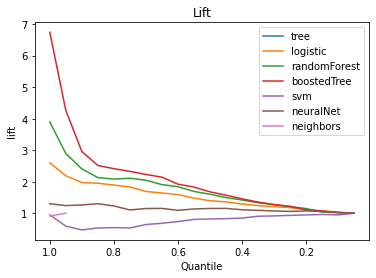

In [1049]:
# Plotting and comparing the lift for each model
for model in models:
    plt.plot(lifts[model]["Quantile"], lifts[model]["Lift"], label = model)
    plt.gca().invert_xaxis()
    plt.xlabel("Quantile")
    plt.ylabel("lift")
    plt.title("Lift")
    plt.legend()

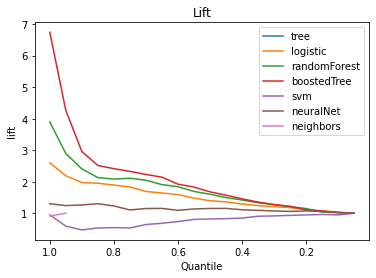

In [1050]:
#Analysis Lift
for model in models:
    pyplot.plot(lifts[model]["Quantile"], lifts[model]["Lift"], label =model)
    pyplot.gca().invert_xaxis()
    pyplot.xlabel("Quantile")
    pyplot.ylabel("lift")
    pyplot.title("Lift")
    pyplot.legend()

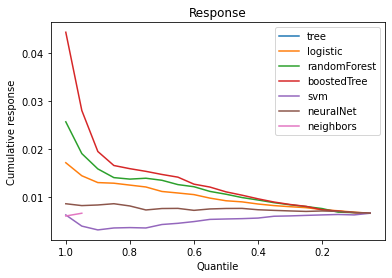

In [1051]:
#Analysis Response
for model in models:
    pyplot.plot(responses[model]["Quantile"], responses[model]["Cumulative response"], label =model)
    pyplot.gca().invert_xaxis()
    pyplot.xlabel("Quantile")
    pyplot.ylabel("Cumulative response")
    pyplot.title("Response")
    pyplot.legend()

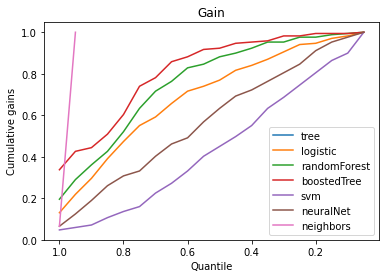

In [1052]:
#Analysis Gain
for model in models:
    pyplot.plot(gains[model]["Quantile"], gains[model]["Cumulative gains"], label =model)
    pyplot.gca().invert_xaxis()
    pyplot.xlabel("Quantile")
    pyplot.ylabel("Cumulative gains")
    pyplot.title("Gain")
    pyplot.legend()

## Selected model: Logistic Regression

In [1053]:
regression = LogisticRegression(solver = "newton-cg", max_iter  = 20000)

In [1054]:
regression.fit(trainingSet[selectedFeatures], trainingSet[target])

LogisticRegression(max_iter=20000, solver='newton-cg')

In [1055]:
DataFrame(regression.predict_proba(trainingSet[selectedFeatures]))[1]

0        0.016278
1        0.019301
2        0.018947
3        0.026990
4        0.015108
5        0.040656
6        0.091494
7        0.012909
8        0.023044
9        0.017675
10       0.018348
11       0.014041
12       0.010969
13       0.019488
14       0.014489
15       0.014512
16       0.011591
17       0.030993
18       0.003702
19       0.015285
20       0.013665
21       0.016260
22       0.015660
23       0.014680
24       0.018745
25       0.018644
26       0.039417
27       0.016565
28       0.008492
29       0.021621
30       0.022495
31       0.022667
32       0.012639
33       0.011344
34       0.028894
35       0.031423
36       0.012717
37       0.012768
38       0.012921
39       0.024880
40       0.020326
41       0.020540
42       0.023605
43       0.063049
44       0.013501
45       0.012758
46       0.013986
47       0.016484
48       0.025582
49       0.013661
50       0.016842
51       0.025078
52       0.011049
53       0.029786
54       0.021329
55       0

In [1056]:
trainingSet["proba donated"] = DataFrame(regression.predict_proba(trainingSet[selectedFeatures]))[1]
testSet["proba donated"]     = DataFrame(regression.predict_proba(testSet[selectedFeatures]))[1]

In [1057]:
aucTraining = roc_auc_score(array(trainingSet[target]),array(trainingSet["proba donated"]))
aucTest     = roc_auc_score(array(testSet[target]),array(testSet["proba donated"]))

print(aucTraining)
print(aucTest)

0.7026259700204718
0.667969784300992


In [1058]:
rocTraining = roc(dataSet = trainingSet, actuals = target, probability = "proba donated")
rocTest     = roc(dataSet = testSet, actuals = target, probability = "proba donated")

Text(0.5, 1.0, 'Receiver Operating Characteristic')

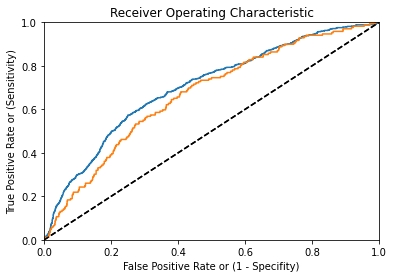

In [1059]:
pyplot.plot(rocTraining["False positive rate"], rocTraining["True positive rate"])
pyplot.plot([0, 1], [0, 1], 'k--')
pyplot.xlim([0.0, 1.0])
pyplot.ylim([0.0, 1.0])
pyplot.xlabel("False Positive Rate or (1 - Specifity)")
pyplot.ylabel("True Positive Rate or (Sensitivity)")
pyplot.title("Receiver Operating Characteristic")

pyplot.plot(rocTest["False positive rate"], rocTest["True positive rate"])
pyplot.plot([0, 1], [0, 1], 'k--')
pyplot.xlim([0.0, 1.0])
pyplot.ylim([0.0, 1.0])
pyplot.xlabel("False Positive Rate or (1 - Specifity)")
pyplot.ylabel("True Positive Rate or (Sensitivity)")
pyplot.title("Receiver Operating Characteristic")

## Logistic model

In [1090]:
# Add index to the graphs for the selected model
dictionary = {1.00 : 0.00, 
              0.95 : 0.05, 
              0.90 : 0.10, 
              0.85 : 0.15, 
              0.80 : 0.20, 
              0.75 : 0.25, 
              0.70 : 0.30, 
              0.65 : 0.35, 
              0.60 : 0.40, 
              0.55 : 0.45,
              0.50 : 0.50,
              0.45 : 0.55,
              0.40 : 0.6,
              0.35 : 0.65,
              0.30 : 0.7,
              0.25 : 0.75,
              0.20 : 0.8,
              0.15 : 0.85,
              0.10 : 0.9,
              0.05 : 0.95,
              0.00 : 1.0
             }

#### Response, Lift and Cumulative Gains

In [1091]:
# Adjust the quantile index for Responses
responses2 = responses["logistic"]
responses2['Quantile2'] = 1 - responses2['Quantile']
responses2.head()

Quantile  Cumulative response  Average response  Quantile2
19      1.00             0.017147           0.00659       0.00
18      0.95             0.014425           0.00659       0.05
17      0.90             0.012997           0.00659       0.10
16      0.85             0.012868           0.00659       0.15
15      0.80             0.012471           0.00659       0.20

Text(0.5, 1.0, 'Cumulative response')

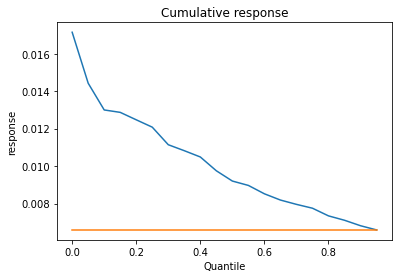

In [1092]:
pyplot.plot(responses2["Quantile2"], responses2["Cumulative response"])
pyplot.plot(responses2["Quantile2"], responses2["Average response"])
pyplot.gca()
pyplot.xlabel("Quantile")
pyplot.ylabel("response")
pyplot.title("Cumulative response")

In [1093]:
# Adjust the quantile index for lifts
lifts2 = lifts["logistic"]
lifts2['Quantile2'] = lifts2['Quantile'].map(dictionary)
lifts2.head(5)

Quantile      Lift  Base  Quantile2
19      1.00  2.602028   1.0       0.00
18      0.95  2.188922   1.0       0.05
17      0.90  1.972258   1.0       0.10
16      0.85  1.952663   1.0       0.15
15      0.80  1.892384   1.0       0.20

Text(0.5, 1.0, 'Lift')

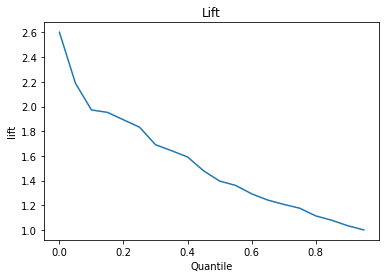

In [1094]:
pyplot.plot(lifts2["Quantile2"], lifts2["Lift"])
pyplot.gca()
pyplot.xlabel("Quantile")
pyplot.ylabel("lift")
pyplot.title("Lift")

In [1095]:
# Adjust the quantile index for gains
gains2 = gains["logistic"]
gains2['Quantile2'] = gains2['Quantile'].map(dictionary)
gains2.head(5)

Quantile  Cumulative gains  Base  Quantile2
19      1.00          0.130178  1.00       0.00
18      0.95          0.218935  0.95       0.05
17      0.90          0.295858  0.90       0.10
16      0.85          0.390533  0.85       0.15
15      0.80          0.473373  0.80       0.20

Text(0.5, 1.0, 'Cumulative gains')

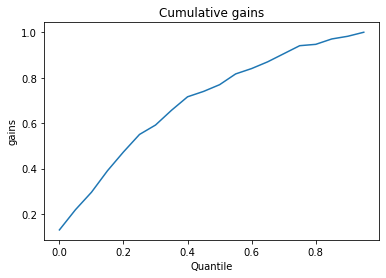

In [1096]:
pyplot.plot(gains2["Quantile2"], gains2["Cumulative gains"])
pyplot.gca()
pyplot.xlabel("Quantile")
pyplot.ylabel("gains")
pyplot.title("Cumulative gains")

#### Response Rate - Quantile 0.99

In [1097]:
# With the chosen model regression, if we would have launched 1% of the population, our campaign response rate is 0.8%

subset = testSet[testSet['proba donated'] > testSet['proba donated'].quantile(.99)]

targetcount = subset[subset['Donated']==1]['Donated'].value_counts()
subsetcount = subset['donorID'].nunique()
(targetcount / subsetcount) * 100

1.0    0.77821
Name: Donated, dtype: float64

## Model Validation (Campaign 7662)

In [1098]:
# Import File
validation_campaign = pd.read_csv(directory + "\selection campaign 7662.csv")

#Extract the donorID without the ID and convert to integer
validation_campaign['donorID'] = validation_campaign['donorID'].astype(str).str[1:].astype('int')

### Data Processing

#### Donors

In [1099]:
df_7662 = validation_campaign

In [1100]:
# Create dummy variables for region
df_7662['region'] = Donors.region
df_7662 = pd.get_dummies(df_7662, ['region'])

# Create dummy for gender
df_7662['gender'] = Donors.gender
df_7662 = pd.get_dummies(df_7662, ['gender'])

# Create dummy for language
df_7662['language'] = Donors.language
df_7662 = pd.get_dummies(df_7662, ['language'])
df_7662.head()

donorID  region_Brussels  region_Flanders  region_Missing  region_Wallonia  \
0   134242                0                1               0                0   
1   126503                0                1               0                0   
2   104392                0                1               0                0   
3   105905                1                0               0                0   
4   120506                1                0               0                0   

   gender_F  gender_M  language_EN  language_FR  language_NL  
0         1         0            0            0            1  
1         0         1            0            0            1  
2         0         1            0            0            1  
3         1         0            0            1            0  
4         1         0            0            1            0

In [1101]:
#compute donors' age as of drop date
df_7662['age'] = datetime(2020, 2, 1) - Donors.DOB
df_7662['age']= df_7662['age']/np.timedelta64(1, 'Y')
df_7662['age'] = np.floor(df_7662['age'])
df_7662['age'] = df_7662['age'].astype(int)
df_7662.head()

donorID  region_Brussels  region_Flanders  region_Missing  region_Wallonia  \
0   134242                0                1               0                0   
1   126503                0                1               0                0   
2   104392                0                1               0                0   
3   105905                1                0               0                0   
4   120506                1                0               0                0   

   gender_F  gender_M  language_EN  language_FR  language_NL  age  
0         1         0            0            0            1   52  
1         0         1            0            0            1   68  
2         0         1            0            0            1   33  
3         1         0            0            1            0   67  
4         1         0            0            1            0   33

In [1102]:
#group by age
df_7662['age_group'] = df_7662['age'] // 10 * 10
df_7662.head()

donorID  region_Brussels  region_Flanders  region_Missing  region_Wallonia  \
0   134242                0                1               0                0   
1   126503                0                1               0                0   
2   104392                0                1               0                0   
3   105905                1                0               0                0   
4   120506                1                0               0                0   

   gender_F  gender_M  language_EN  language_FR  language_NL  age  age_group  
0         1         0            0            0            1   52         50  
1         0         1            0            0            1   68         60  
2         0         1            0            0            1   33         30  
3         1         0            0            1            0   67         60  
4         1         0            0            1            0   33         30

In [1103]:
#There are no outliers in the 7662 dataset
df_7662.age.unique()

array([ 52,  68,  33,  67,  93,  63,  82,  88,  36,  56,  42,  45,  57,
        40,  62,  27,  49,  61,  47,  66,  64,  26,  55,  46,  86,  54,
        44,  25,  60,  59,  32,  51,  37,  65,  30,  87,  43,  53,  28,
        50,  70,  81,  41,  34,  69,  31,  71,  48,  75,  29,  74,  79,
        73,  72,  78,  89,  80,  85,  58,  38,  83,  35,  98,  95,  39,
        77,  76,  92,  90,  84,  97, 100,  91,  24,  96,  99,  94])

#### Gifts

In [1104]:
validation_drop_date = datetime.strptime('2020-02-01', "%Y-%m-%d")

In [1105]:
#Creating time frames
validation_1M = validation_drop_date - relativedelta(months=+1)
validation_3M = validation_drop_date - relativedelta(months=+3)
validation_6M = validation_drop_date - relativedelta(months=+6)
validation_9M = validation_drop_date - relativedelta(months=+9)
validation_1Y = validation_drop_date - relativedelta(months=+12)
validation_2Y = validation_drop_date - relativedelta(months=+24)
validation_5Y = validation_drop_date - relativedelta(months=+60)
validation_10Y = validation_drop_date - relativedelta(months=+120)
validation_15Y = validation_drop_date - relativedelta(months=+180)

In [1106]:
#Creating Gifts 7244 df

#Create variables for Donations for different time frames
gifts_agg_7662 = pd.DataFrame({'amount': Gifts.loc[(Gifts.dateGifts <= validation_drop_date)].groupby(['donorID'])['amount'].agg('sum'),
                               'amount_1Month': Gifts.loc[(Gifts.dateGifts <= validation_drop_date) & (Gifts.dateGifts > validation_1M)].groupby(['donorID'])['amount'].agg('sum'),
                               'amount_3Months': Gifts.loc[(Gifts.dateGifts <= validation_drop_date) & (Gifts.dateGifts > validation_3M)].groupby(['donorID'])['amount'].agg('sum'),
                               'amount_6Months': Gifts.loc[(Gifts.dateGifts <= validation_drop_date) & (Gifts.dateGifts > validation_6M)].groupby(['donorID'])['amount'].agg('sum'),
                               'amount_9Months': Gifts.loc[(Gifts.dateGifts <= validation_drop_date) & (Gifts.dateGifts > validation_9M)].groupby(['donorID'])['amount'].agg('sum'),
                               'amount_1Year': Gifts.loc[(Gifts.dateGifts <= validation_drop_date) & (Gifts.dateGifts > validation_1Y)].groupby(['donorID'])['amount'].agg('sum'),
                               'amount_2Years': Gifts.loc[(Gifts.dateGifts <= validation_drop_date) & (Gifts.dateGifts > validation_2Y)].groupby(['donorID'])['amount'].agg('sum'),
                               'amount_5Years': Gifts.loc[(Gifts.dateGifts <= validation_drop_date) & (Gifts.dateGifts > validation_5Y)].groupby(['donorID'])['amount'].agg('sum'),
                               'amount_10Years': Gifts.loc[(Gifts.dateGifts <= validation_drop_date) & (Gifts.dateGifts > validation_10Y)].groupby(['donorID'])['amount'].agg('sum'),
                               'amount_15Years': Gifts.loc[(Gifts.dateGifts <= validation_drop_date) & (Gifts.dateGifts > validation_15Y)].groupby(['donorID'])['amount'].agg('sum'),
                               'avg_totalAmount': Gifts.loc[(Gifts.dateGifts <= validation_drop_date)].groupby(['donorID'])['amount'].agg('mean'),
                               'avgAmount_1Month': Gifts.loc[(Gifts.dateGifts <= validation_drop_date) & (Gifts.dateGifts > validation_1M)].groupby(['donorID'])['amount'].agg('mean'),
                               'avgAmount_3Months': Gifts.loc[(Gifts.dateGifts <= validation_drop_date) & (Gifts.dateGifts > validation_3M)].groupby(['donorID'])['amount'].agg('mean'),
                               'avgAmount_6Months': Gifts.loc[(Gifts.dateGifts <= validation_drop_date) & (Gifts.dateGifts > validation_6M)].groupby(['donorID'])['amount'].agg('mean'), 
                               'avgAmount_9Months': Gifts.loc[(Gifts.dateGifts <= validation_drop_date) & (Gifts.dateGifts > validation_9M)].groupby(['donorID'])['amount'].agg('mean'), 
                               'avgAmount_1Year': Gifts.loc[(Gifts.dateGifts <= validation_drop_date) & (Gifts.dateGifts > validation_1Y)].groupby(['donorID'])['amount'].agg('mean'), 
                               'avgAmount_2Years': Gifts.loc[(Gifts.dateGifts <= validation_drop_date) & (Gifts.dateGifts > validation_2Y)].groupby(['donorID'])['amount'].agg('mean'), 
                               'avgAmount_5Years': Gifts.loc[(Gifts.dateGifts <= validation_drop_date) & (Gifts.dateGifts > validation_5Y)].groupby(['donorID'])['amount'].agg('mean'), 
                               'avgAmount_10Years': Gifts.loc[(Gifts.dateGifts <= validation_drop_date) & (Gifts.dateGifts > validation_10Y)].groupby(['donorID'])['amount'].agg('mean'), 
                               'avgAmount_15Years': Gifts.loc[(Gifts.dateGifts <= validation_drop_date) & (Gifts.dateGifts > validation_15Y)].groupby(['donorID'])['amount'].agg('mean'),
                               'nbr_totalDonations': Gifts.loc[(Gifts.dateGifts <= validation_drop_date)].groupby(['donorID'])['amount'].agg('count').astype(int),
                               'nbr_totalDonations_1Month': Gifts.loc[(Gifts.dateGifts <= validation_drop_date) & (Gifts.dateGifts > validation_1M)].groupby(['donorID'])['amount'].agg('count').astype(int),
                               'nbr_totalDonations_3Months': Gifts.loc[(Gifts.dateGifts <= validation_drop_date) & (Gifts.dateGifts > validation_3M)].groupby(['donorID'])['amount'].agg('count').astype(int),
                               'nbr_totalDonations_6Months': Gifts.loc[(Gifts.dateGifts <= validation_drop_date) & (Gifts.dateGifts > validation_6M)].groupby(['donorID'])['amount'].agg('count').astype(int),
                               'nbr_totalDonations_9Months': Gifts.loc[(Gifts.dateGifts <= validation_drop_date) & (Gifts.dateGifts > validation_9M)].groupby(['donorID'])['amount'].agg('count').astype(int),
                               'nbr_totalDonations_1Year': Gifts.loc[(Gifts.dateGifts <= validation_drop_date) & (Gifts.dateGifts > validation_1Y)].groupby(['donorID'])['amount'].agg('count').astype(int),
                               'nbr_totalDonations_2Years': Gifts.loc[(Gifts.dateGifts <= validation_drop_date) & (Gifts.dateGifts > validation_2Y)].groupby(['donorID'])['amount'].agg('count').astype(int),
                               'nbr_totalDonations_5Years': Gifts.loc[(Gifts.dateGifts <= validation_drop_date) & (Gifts.dateGifts > validation_5Y)].groupby(['donorID'])['amount'].agg('count').astype(int),
                               'nbr_totalDonations_10Years': Gifts.loc[(Gifts.dateGifts <= validation_drop_date) & (Gifts.dateGifts > validation_10Y)].groupby(['donorID'])['amount'].agg('count').astype(int),
                               'nbr_totalDonations_15Years': Gifts.loc[(Gifts.dateGifts <= validation_drop_date) & (Gifts.dateGifts > validation_15Y)].groupby(['donorID'])['amount'].agg('count').astype(int)
                              }).reset_index()


gifts_agg_7662.head()


donorID  amount  amount_1Month  amount_3Months  amount_6Months  \
0   100001  178.49            NaN             NaN             NaN   
1   100002   20.00            NaN             NaN             NaN   
2   100003   46.00            NaN             NaN             NaN   
3   100004  716.22            NaN             NaN             NaN   
4   100005   24.96            NaN             NaN             NaN   

   amount_9Months  amount_1Year  amount_2Years  amount_5Years  amount_10Years  \
0             NaN           NaN            NaN            NaN            60.0   
1             NaN           NaN            NaN            NaN            20.0   
2             8.0          16.0           35.0           46.0            46.0   
3             NaN           NaN            NaN            NaN           150.0   
4             NaN          10.0           15.0           20.0            20.0   

   ...  nbr_totalDonations  nbr_totalDonations_1Month  \
0  ...                  12                        NaN   
1  ...                   1                        NaN   
2  ...                  12                        NaN   
3  ...                  26                        NaN   
4  ...                   5                        NaN   

   nbr_totalDonations_3Months  nbr_totalDonations_6Months  \
0                         NaN                         NaN   
1                         NaN                         NaN   
2                         NaN                         NaN   
3                         NaN                         NaN   
4                         NaN                         NaN   

   nbr_totalDonations_9Months  nbr_totalDonations_1Year  \
0                         NaN                       NaN   
1                         NaN                       NaN   
2                         2.0                       4.0   
3                         NaN                       NaN   
4                         NaN                       1.0   

   nbr_totalDonations_2Years  nbr_totalDonations_5Years  \
0                        NaN                        NaN   
1                        NaN                        NaN   
2                        9.0                       12.0   
3                        NaN                        NaN   
4                        2.0                        3.0   

   nbr_totalDonations_10Years  nbr_totalDonations_15Years  
0                         5.0                        11.0  
1                         1.0                         1.0  
2                        12.0                        12.0  
3                         5.0                        26.0  
4                         3.0                         5.0  

[5 rows x 31 columns]

In [1107]:
#Additional Variables

#MAX Amount 
gifts_agg_7662_max_amount = Gifts.loc[(Gifts.dateGifts < validation_drop_date)].groupby(['donorID'])['amount'].agg('max').reset_index()
gifts_agg_7662_max_amount = gifts_agg_7662_max_amount.rename(columns= {'amount':'Max_Amount'})


#Days Since First Donation
#First Date Donated
gifts_agg_7662_DaysSinceFirstDonated = Gifts.loc[(Gifts.dateGifts < validation_drop_date)].groupby(['donorID'])['dateGifts'].agg('min').reset_index()
gifts_agg_7662_DaysSinceFirstDonated['DaysSinceFirstDonation'] = ((validation_drop_date - gifts_agg_7662_DaysSinceFirstDonated['dateGifts'])/ np.timedelta64(1, 'D')).astype(int)
gifts_agg_7662_DaysSinceFirstDonated = gifts_agg_7662_DaysSinceFirstDonated.drop(columns = 'dateGifts')
gifts_agg_7662_DaysSinceFirstDonated.head()

donorID  DaysSinceFirstDonation
0   100001                    5793
1   100002                    1848
2   100003                     919
3   100004                    5327
4   100005                    4865

#### Campaigns

In [1108]:
#Subset the dataset to compute for the max date before drop date of campaign
#https://stackoverflow.com/questions/17978133/python-pandas-merge-only-certain-columns
GC_Pre_7662 = Gifts_Campaigns[Gifts_Campaigns['dateGifts'] < validation_drop_date]
GC_Pre_7662_wc = Gifts_Campaigns[(Gifts_Campaigns["campaignID"] != 0) & (Gifts_Campaigns['dateGifts'] < validation_drop_date)]
GC_Pre_7662_nc = Gifts_Campaigns[(Gifts_Campaigns["campaignID"] == 0) & (Gifts_Campaigns['dateGifts'] < validation_drop_date)]

In [1109]:
GC_byDonor_7662 = pd.DataFrame()

#Add Variables to Count the Number of Campaigns Responded By Each Donor for Different Durations
GC_byDonor_7662['Count_Campaigns_Donated'] = GC_Pre_7662_wc.groupby('donorID')['campaignID'].count()
GC_byDonor_7662['Count_Campaigns_Donated_1M'] = GC_Pre_7662_wc[(GC_Pre_7662['dateGifts'] >= validation_1M)].groupby('donorID')['campaignID'].count()
GC_byDonor_7662['Count_Campaigns_Donated_3M'] = GC_Pre_7662_wc[(GC_Pre_7662['dateGifts'] >= validation_3M)].groupby('donorID')['campaignID'].count()
GC_byDonor_7662['Count_Campaigns_Donated_6M'] = GC_Pre_7662_wc[(GC_Pre_7662['dateGifts'] >= validation_6M)].groupby('donorID')['campaignID'].count()
GC_byDonor_7662['Count_Campaigns_Donated_9M'] = GC_Pre_7662_wc[(GC_Pre_7662['dateGifts'] >= validation_9M)].groupby('donorID')['campaignID'].count()
GC_byDonor_7662['Count_Campaigns_Donated_12M'] = GC_Pre_7662_wc[(GC_Pre_7662['dateGifts'] >= validation_1Y)].groupby('donorID')['campaignID'].count()
GC_byDonor_7662['Count_Campaigns_Donated_2Y'] = GC_Pre_7662_wc[(GC_Pre_7662['dateGifts'] >= validation_2Y)].groupby('donorID')['campaignID'].count()
GC_byDonor_7662['Count_Campaigns_Donated_5Y'] = GC_Pre_7662_wc[(GC_Pre_7662['dateGifts'] >= validation_5Y)].groupby('donorID')['campaignID'].count()
GC_byDonor_7662['Count_Campaigns_Donated_10Y'] = GC_Pre_7662_wc[(GC_Pre_7662['dateGifts'] >= validation_10Y)].groupby('donorID')['campaignID'].count()
GC_byDonor_7662['Count_Campaigns_Donated_15Y'] = GC_Pre_7662_wc[(GC_Pre_7662['dateGifts'] >= validation_15Y)].groupby('donorID')['campaignID'].count()

#Add Variable to count the number of days since last donated with or without
#https://www.includehelp.com/python/max-and-min-date-in-pandas-groupby.aspx
GC_byDonor_7662['Days_Last_Donated_nc'] = validation_drop_date - (GC_Pre_7662_nc.groupby(['donorID']).agg({'dateGifts': [np.max]}))
GC_byDonor_7662['Days_Last_Donated_nc'] = GC_byDonor_7662['Days_Last_Donated_nc'] / np.timedelta64(1, 'D')
GC_byDonor_7662['Days_Last_Donated_nc'].replace([np.nan], 0, inplace=True)
GC_byDonor_7662['Days_Last_Donated_nc'] = GC_byDonor_7662['Days_Last_Donated_nc'].astype(int)

#Add Variable to count the number of days since last donated with a campaign before drop date
GC_byDonor_7662['Days_Last_Donated_wc'] = validation_drop_date - (GC_Pre_7662_wc.groupby(['donorID']).agg({'dateGifts': [np.max]}))
GC_byDonor_7662['Days_Last_Donated_wc'] = GC_byDonor_7662['Days_Last_Donated_wc'] / np.timedelta64(1, 'D')
GC_byDonor_7662['Days_Last_Donated_wc'].replace([np.nan], 0, inplace=True)
GC_byDonor_7662['Days_Last_Donated_wc'] = GC_byDonor_7662['Days_Last_Donated_wc'].astype(int)

#Add Variable to compute average response time per donor for different durations
GC_byDonor_7662['Ave_Response_Time_inDays'] = round(GC_Pre_7662_wc.groupby(["donorID"])["DaysResponded"].mean(),0).astype(int)
GC_byDonor_7662['Ave_Response_Time_inDays_1M'] = round(GC_Pre_7662_wc[(GC_Pre_7662['dateGifts'] >= validation_1M)].groupby(["donorID"])["DaysResponded"].mean(),0).astype(int)
GC_byDonor_7662['Ave_Response_Time_inDays_3M'] = round(GC_Pre_7662_wc[(GC_Pre_7662['dateGifts'] >= validation_3M)].groupby(["donorID"])["DaysResponded"].mean(),0).astype(int)
GC_byDonor_7662['Ave_Response_Time_inDays_6M'] = round(GC_Pre_7662_wc[(GC_Pre_7662['dateGifts'] >= validation_6M)].groupby(["donorID"])["DaysResponded"].mean(),0).astype(int)
GC_byDonor_7662['Ave_Response_Time_inDays_9M'] = round(GC_Pre_7662_wc[(GC_Pre_7662['dateGifts'] >= validation_9M)].groupby(["donorID"])["DaysResponded"].mean(),0).astype(int)
GC_byDonor_7662['Ave_Response_Time_inDays_12M'] = round(GC_Pre_7662_wc[(GC_Pre_7662['dateGifts'] >= validation_1Y)].groupby(["donorID"])["DaysResponded"].mean(),0).astype(int)
GC_byDonor_7662['Ave_Response_Time_inDays_2Y'] = round(GC_Pre_7662_wc[(GC_Pre_7662['dateGifts'] >= validation_2Y)].groupby(["donorID"])["DaysResponded"].mean(),0).astype(int)
GC_byDonor_7662['Ave_Response_Time_inDays_5Y'] = round(GC_Pre_7662_wc[(GC_Pre_7662['dateGifts'] >= validation_5Y)].groupby(["donorID"])["DaysResponded"].mean(),0).astype(int)
GC_byDonor_7662['Ave_Response_Time_inDays_10Y'] = round(GC_Pre_7662_wc[(GC_Pre_7662['dateGifts'] >= validation_10Y)].groupby(["donorID"])["DaysResponded"].mean(),0).astype(int)
GC_byDonor_7662['Ave_Response_Time_inDays_15Y'] = round(GC_Pre_7662_wc[(GC_Pre_7662['dateGifts'] >= validation_15Y)].groupby(["donorID"])["DaysResponded"].mean(),0).astype(int)

#Calculate the Total Cost Spent per donor for different durations
GC_byDonor_7662['Total Cost'] = GC_Pre_7662_wc.groupby('donorID')['Cost_Per_Donor'].sum()
GC_byDonor_7662['Total Cost_1M'] = GC_Pre_7662_wc[(GC_Pre_7662['dateGifts'] >= validation_1M)].groupby('donorID')['Cost_Per_Donor'].sum()
GC_byDonor_7662['Total Cost_3M'] = GC_Pre_7662_wc[(GC_Pre_7662['dateGifts'] >= validation_3M)].groupby('donorID')['Cost_Per_Donor'].sum()
GC_byDonor_7662['Total Cost_6M'] = GC_Pre_7662_wc[(GC_Pre_7662['dateGifts'] >= validation_6M)].groupby('donorID')['Cost_Per_Donor'].sum()
GC_byDonor_7662['Total Cost_9M'] = GC_Pre_7662_wc[(GC_Pre_7662['dateGifts'] >= validation_9M)].groupby('donorID')['Cost_Per_Donor'].sum()
GC_byDonor_7662['Total Cost_12M'] = GC_Pre_7662_wc[(GC_Pre_7662['dateGifts'] >= validation_1Y)].groupby('donorID')['Cost_Per_Donor'].sum()
GC_byDonor_7662['Total Cost_2Y'] = GC_Pre_7662_wc[(GC_Pre_7662['dateGifts'] >= validation_2Y)].groupby('donorID')['Cost_Per_Donor'].sum()
GC_byDonor_7662['Total Cost_5Y'] = GC_Pre_7662_wc[(GC_Pre_7662['dateGifts'] >= validation_5Y)].groupby('donorID')['Cost_Per_Donor'].sum()
GC_byDonor_7662['Total Cost_10Y'] = GC_Pre_7662_wc[(GC_Pre_7662['dateGifts'] >= validation_10Y)].groupby('donorID')['Cost_Per_Donor'].sum()
GC_byDonor_7662['Total Cost_15Y'] = GC_Pre_7662_wc[(GC_Pre_7662['dateGifts'] >= validation_15Y)].groupby('donorID')['Cost_Per_Donor'].sum()

GC_byDonor_7662 = GC_byDonor_7662.reset_index()
GC_byDonor_7662.replace([np.nan], 0, inplace=True)
GC_byDonor_7662.head()


donorID  Count_Campaigns_Donated  Count_Campaigns_Donated_1M  \
0   100001                       11                         0.0   
1   100002                        1                         0.0   
2   100003                       12                         0.0   
3   100004                       25                         0.0   
4   100005                        5                         0.0   

   Count_Campaigns_Donated_3M  Count_Campaigns_Donated_6M  \
0                         0.0                         0.0   
1                         0.0                         0.0   
2                         0.0                         0.0   
3                         0.0                         0.0   
4                         0.0                         0.0   

   Count_Campaigns_Donated_9M  Count_Campaigns_Donated_12M  \
0                         0.0                          0.0   
1                         0.0                          0.0   
2                         2.0                          4.0   
3                         0.0                          0.0   
4                         0.0                          1.0   

   Count_Campaigns_Donated_2Y  Count_Campaigns_Donated_5Y  \
0                         0.0                         0.0   
1                         0.0                         0.0   
2                         9.0                        12.0   
3                         0.0                         0.0   
4                         2.0                         3.0   

   Count_Campaigns_Donated_10Y  ...  Total Cost  Total Cost_1M  Total Cost_3M  \
0                          5.0  ...       94.56            0.0            0.0   
1                          1.0  ...       26.31            0.0            0.0   
2                         12.0  ...      200.23            0.0            0.0   
3                          5.0  ...      294.60            0.0            0.0   
4                          3.0  ...       75.90            0.0            0.0   

   Total Cost_6M  Total Cost_9M  Total Cost_12M  Total Cost_2Y  Total Cost_5Y  \
0            0.0           0.00            0.00           0.00           0.00   
1            0.0           0.00            0.00           0.00           0.00   
2            0.0          16.88           31.95         131.69         200.23   
3            0.0           0.00            0.00           0.00           0.00   
4            0.0           0.00           28.45          38.17          57.39   

   Total Cost_10Y  Total Cost_15Y  
0           36.92           94.56  
1           26.31           26.31  
2          200.23          200.23  
3           43.91          294.60  
4           57.39           75.90  

[5 rows x 33 columns]

In [1110]:
#Creating dfs for if donated or not per campaign
gifts_by_campaign_7662 = GC_Pre_7662.pivot_table(index='donorID', columns='campaignID', values='amount', aggfunc='count').reset_index().replace(np.nan, 0).astype(int)
gifts_by_campaign_7662 = gifts_by_campaign_7662.rename(columns = {0: 'NoCampaign'})

#Creating dfs for amount donated per campaign
gifts_by_campaign_amount_7662 = GC_Pre_7662.pivot_table(index='donorID', columns='campaignID', values='amount', aggfunc='sum').reset_index().replace(np.nan, 0).astype(int)
gifts_by_campaign_amount_7662 = gifts_by_campaign_7662.rename(columns = {0: 'NoCampaign'})

In [1111]:
#Campaign date with donation count by day
campaign_donated_count_by_day_7662 = GC_Pre_7662.pivot_table(index='donorID', columns='Campaign_Day', values='amount', aggfunc='count').reset_index().replace(np.nan, 0).astype(int)
campaign_donated_count_by_day_7662 = campaign_donated_count_by_day_7662.add_prefix('Donated_Count_Campaign_Day')
campaign_donated_count_by_day_7662 = campaign_donated_count_by_day_7662.rename(columns = {'Donated_Count_Campaign_DaydonorID': 'donorID'})

#Campaign date with donation amount by day
campaign_donated_amount_by_day_7662 = GC_Pre_7662.pivot_table(index='donorID', columns='Campaign_Day', values='amount', aggfunc='sum').reset_index().replace(np.nan, 0).astype(int)
campaign_donated_amount_by_day_7662 = campaign_donated_amount_by_day_7662.add_prefix('Donated_Amount_Campaign_Day')
campaign_donated_amount_by_day_7662 = campaign_donated_amount_by_day_7662.rename(columns = {'Donated_Amount_Campaign_DaydonorID': 'donorID'})

#Campaign date with donation count by day
campaign_donated_count_by_weekday_7662 = GC_Pre_7662.pivot_table(index='donorID', columns='Campaign_Weekday', values='amount', aggfunc='count').reset_index().replace(np.nan, 0).astype(int)
campaign_donated_count_by_weekday_7662 = campaign_donated_count_by_weekday_7662.add_prefix('Donated_Count_Campaign_WeekDay')
campaign_donated_count_by_weekday_7662 = campaign_donated_count_by_weekday_7662.rename(columns = {'Donated_Count_Campaign_WeekDaydonorID': 'donorID'})

#Campaign date with donation amount by day
campaign_donated_amount_by_weekday_7662 = GC_Pre_7662.pivot_table(index='donorID', columns='Campaign_Weekday', values='amount', aggfunc='sum').reset_index().replace(np.nan, 0).astype(int)
campaign_donated_amount_by_weekday_7662 = campaign_donated_amount_by_weekday_7662.add_prefix('Donated_Amount_Campaign_WeekDay')
campaign_donated_amount_by_weekday_7662 = campaign_donated_amount_by_weekday_7662.rename(columns = {'Donated_Amount_Campaign_WeekDaydonorID': 'donorID'})


campaign_donated_by_period_7662 = campaign_donated_count_by_day_7662.merge(campaign_donated_amount_by_day_7662, on = 'donorID', how = 'outer').merge(campaign_donated_count_by_weekday_7662, on = 'donorID', how = 'outer').merge(campaign_donated_amount_by_weekday_7662, on = 'donorID', how = 'outer').fillna(0)
campaign_donated_by_period.head()


donorID  Donated_Count_Campaign_Day1  Donated_Count_Campaign_Day2  \
0   100001                            1                            1   
1   100002                            0                            0   
2   100003                            0                            0   
3   100004                            2                            3   
4   100005                            0                            0   

   Donated_Count_Campaign_Day3  Donated_Count_Campaign_Day4  \
0                            0                            0   
1                            0                            0   
2                            0                            0   
3                            1                            1   
4                            0                            0   

   Donated_Count_Campaign_Day5  Donated_Count_Campaign_Day6  \
0                            1                            0   
1                            0                            0   
2                            0                            0   
3                            3                            0   
4                            0                            0   

   Donated_Count_Campaign_Day7  Donated_Count_Campaign_Day8  \
0                            0                            1   
1                            0                            0   
2                            0                            1   
3                            1                            2   
4                            1                            1   

   Donated_Count_Campaign_Day9  ...  Donated_Count_Campaign_WeekDay4  \
0                            1  ...                                4   
1                            0  ...                                0   
2                            0  ...                                2   
3                            1  ...                                7   
4                            0  ...                                0   

   Donated_Count_Campaign_WeekDay5  Donated_Count_Campaign_WeekDay6  \
0                                2                                0   
1                                1                                0   
2                                1                                1   
3                                5                                2   
4                                1                                0   

   Donated_Amount_Campaign_WeekDay0  Donated_Amount_Campaign_WeekDay1  \
0                                54                                12   
1                                 0                                 0   
2                                 0                                 0   
3                               104                                74   
4                                 0                                 5   

   Donated_Amount_Campaign_WeekDay2  Donated_Amount_Campaign_WeekDay3  \
0                                 7                                22   
1                                 0                                 0   
2                                 0                                 5   
3                                99                                24   
4                                 7                                 0   

   Donated_Amount_Campaign_WeekDay4  Donated_Amount_Campaign_WeekDay5  \
0                                46                                34   
1                                 0                                20   
2                                 7                                 3   
3                               219                               134   
4                                 0                                 2   

   Donated_Amount_Campaign_WeekDay6  
0                                 0  
1                                 0  
2                                 3  
3                                60  
4                                 0  

[5 rows x 77 columns]

In [1112]:
#Merging the variables with the test set
validationSet = df_7662.merge(gifts_agg_7662, on = "donorID", how = 'left').merge(GC_byDonor_7662, on = "donorID", how = 'left').merge(gifts_agg_7662_max_amount, on = "donorID", how = 'left').merge(gifts_agg_7662_DaysSinceFirstDonated, on = "donorID", how = 'left').merge(gifts_by_campaign_7662, on = "donorID", how = 'left').merge(gifts_by_campaign_amount_7662, on = "donorID", how = 'left').merge(campaign_donated_by_period_7662, on = "donorID", how = 'left').fillna(0)
validationSet.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 26522 entries, 0 to 26521
Columns: 888 entries, donorID to Donated_Amount_Campaign_WeekDay6
dtypes: float64(876), int32(3), uint8(9)
memory usage: 178.0 MB


In [1113]:
#Adding the revenue variables
validationSet["Total_Revenue"] = validationSet["amount"] - validationSet["Total Cost"]
validationSet["Revenue_1M"] = validationSet["amount_1Month"] - validationSet["Total Cost_1M"]
validationSet["Revenue_3M"] = validationSet["amount_3Months"] - validationSet["Total Cost_3M"]
validationSet["Revenue_6M"] = validationSet["amount_6Months"] - validationSet["Total Cost_6M"]
validationSet["Revenue_9M"] = validationSet["amount_9Months"] - validationSet["Total Cost_9M"]
validationSet["Revenue_1Y"] = validationSet["amount_1Year"] - validationSet["Total Cost_12M"]
validationSet["Revenue_2Y"] = validationSet["amount_2Years"] - validationSet["Total Cost_2Y"]
validationSet["Revenue_5Y"] = validationSet["amount_5Years"] - validationSet["Total Cost_5Y"]
validationSet["Revenue_10Y"] = validationSet["amount_10Years"] - validationSet["Total Cost_10Y"]
validationSet["Revenue_15Y"] = validationSet["amount_15Years"] - validationSet["Total Cost_15Y"]

### Creating the probabilities

In [1114]:
# Create the probability column on the validationSet 
validationSet.loc[:,'prob'] = DataFrame(models["logistic"].predict_proba(validationSet[selectedFeatures]))[1]
validationSet = validationSet.sort_values(by=["prob"],ascending=False)
validationSet = validationSet.fillna(0)
validationSet["prob"] = validationSet["prob"].astype(str).str[:5].astype(float)

validationSet.head()

donorID  region_Brussels  region_Flanders  region_Missing  \
25490   120203                0                1               0   
19040   124717                0                1               0   
16949   119896                0                1               0   
8565    120368                0                1               0   
11304   128882                0                1               0   

       region_Wallonia  gender_F  gender_M  language_EN  language_FR  \
25490                0         1         0            0            0   
19040                0         1         0            0            0   
16949                0         1         0            0            0   
8565                 0         1         0            0            0   
11304                0         0         1            0            0   

       language_NL  ...  Revenue_1M  Revenue_3M  Revenue_6M  Revenue_9M  \
25490            1  ...         0.0         0.0         0.0        0.00   
19040            1  ...         0.0         0.0         0.0        0.00   
16949            1  ...         0.0         0.0         0.0        0.00   
8565             1  ...         0.0         0.0         0.0        0.00   
11304            1  ...         0.0         0.0         0.0       84.88   

       Revenue_1Y  Revenue_2Y  Revenue_5Y  Revenue_10Y  Revenue_15Y   prob  
25490        0.00        0.00      104.34       762.02       968.15  0.768  
19040        0.00      149.09      176.92      1795.97      1795.97  0.700  
16949        0.00        0.00      299.45      1548.32      2062.38  0.698  
8565         0.00       98.47       98.47       222.42       594.27  0.585  
11304       84.88       84.88       84.88       455.96       455.96  0.556  

[5 rows x 899 columns]

In [1115]:
#Sort the data set
validationSet_sorted = validationSet.sort_values(by="prob")

### Exporting the validation set

In [1124]:
# Export Files
validationSet.to_csv(directory + "\\validatecampaign7662.csv")

## References

IESEG Descriptive and Predictive Analytics Course Materials

Data Manipulation and Visualization
- https://stackoverflow.com/questions/56215535/string-replace-in-python-using-if-statement
- https://stackoverflow.com/questions/60102928/pandas-fillna-only-numeric-int-or-float-columns
- https://stackoverflow.com/questions/30222533/create-a-day-of-week-column-in-a-pandas-dataframe-using-python
- https://stackoverflow.com/questions/17978133/python-pandas-merge-only-certain-columns
- https://www.includehelp.com/python/max-and-min-date-in-pandas-groupby.aspx
- https://pbpython.com/pandas-qcut-cut.html#:~:text=qcut%20The%20pandas%20documentation%20describes%20qcut%20as%20a,not%20the%20actual%20numeric%20edges%20of%20the%20bins.
- https://www.w3schools.com/python/default.asp
- https://www.programiz.com/search/python

Modelling
- https://towardsdatascience.com/meaningful-metrics-cumulative-gains-and-lyft-charts-7aac02fc5c14
- https://towardsdatascience.com/visualize-machine-learning-metrics-like-a-pro-b0d5d7815065
- https://github.com/Tutoman/Donnors_Campaing/blob/main/Project_notebook.ipynb
- https://github.com/fondaa/bigdata/blob/main/PredictiveModelling_EmailActivationCampaign.ipynb
- https://scikit-plot.readthedocs.io/en/stable/metrics.html

DSC
- https://www.pythonpredictions.com/case/targeted-campaign-for-fundraising/